In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from collections import Counter
import json 

In [257]:
import warnings 
warnings.filterwarnings("ignore")

# Data Cleaning

## Match Data

In [258]:
match_data = pd.read_csv("IPL_Matches_2008_2022.csv")

In [259]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [260]:
Counter(match_data['Season'])

Counter({'2013': 76,
         '2022': 74,
         '2012': 74,
         '2011': 73,
         '2021': 60,
         '2020/21': 60,
         '2019': 60,
         '2018': 60,
         '2016': 60,
         '2014': 60,
         '2009/10': 60,
         '2017': 59,
         '2015': 59,
         '2007/08': 58,
         '2009': 57})

In [261]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [262]:
# filling city columng with not_available
match_data['City'] = match_data['City'].fillna("NA")

In [263]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             950 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [264]:
match_data['Player_of_Match'] = match_data['Player_of_Match'].fillna("NA")

In [265]:
venues = match_data['Venue'].unique()
venues = list(venues)
venues.sort()
venues

['Arun Jaitley Stadium',
 'Arun Jaitley Stadium, Delhi',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Brabourne Stadium, Mumbai',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr DY Patil Sports Academy, Mumbai',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Eden Gardens, Kolkata',
 'Feroz Shah Kotla',
 'Green Park',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M.Chinnaswamy Stadium',
 'MA Chidambaram Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'MA Chidambaram Stadium, Chepauk, Chennai',
 'Maharashtra Cricket Association Stadium',
 'Maharashtra Cricket Association Stadium, Pune',
 'Narendra Modi Stadium, Ahmedabad',
 'Nehru Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium',
 'Punjab Cricket Association IS Bind

In [266]:
match_data.loc[match_data['Venue'] == 'Arun Jaitley Stadium', 'Venue'] = 'Arun Jaitley Stadium, Delhi'
match_data.loc[match_data['Venue'] == 'Brabourne Stadium', 'Venue'] = 'Brabourne Stadium, Mumbai'
match_data.loc[match_data['Venue'] == 'Dr DY Patil Sports Academy', 'Venue'] = 'Dr DY Patil Sports Academy, Mumbai'
match_data.loc[match_data['Venue'] == 'Eden Gardens', 'Venue'] = 'Eden Gardens, Kolkata'
match_data.loc[match_data['Venue'] == 'M.Chinnaswamy Stadium', 'Venue'] = 'M Chinnaswamy Stadium'
match_data.loc[match_data['Venue'] == 'MA Chidambaram Stadium', 'Venue'] = 'MA Chidambaram Stadium, Chepauk, Chennai'
match_data.loc[match_data['Venue'] == 'MA Chidambaram Stadium, Chepauk', 'Venue'] = 'MA Chidambaram Stadium, Chepauk, Chennai'
match_data.loc[match_data['Venue'] == 'Maharashtra Cricket Association Stadium', 'Venue'] = 'Maharashtra Cricket Association Stadium, Pune'
match_data.loc[match_data['Venue'] == 'Punjab Cricket Association IS Bindra Stadium', 'Venue'] = 'Punjab Cricket Association IS Bindra Stadium, Mohali'
match_data.loc[match_data['Venue'] == 'Punjab Cricket Association Stadium, Mohali', 'Venue'] = 'Punjab Cricket Association IS Bindra Stadium, Mohali'
match_data.loc[match_data['Venue'] == 'Rajiv Gandhi International Stadium', 'Venue'] = 'Rajiv Gandhi International Stadium, Uppal'
match_data.loc[match_data['Venue'] == 'Wankhede Stadium', 'Venue'] = 'Wankhede Stadium, Mumbai'
# match_data.loc[match_data['Venue'] == '', 'Venue'] = ''


In [267]:
venues = match_data['Venue'].unique()
venues.sort()
venues = list(venues)
venues

['Arun Jaitley Stadium, Delhi',
 'Barabati Stadium',
 'Brabourne Stadium, Mumbai',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy, Mumbai',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens, Kolkata',
 'Feroz Shah Kotla',
 'Green Park',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk, Chennai',
 'Maharashtra Cricket Association Stadium, Pune',
 'Narendra Modi Stadium, Ahmedabad',
 'Nehru Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Saurashtra Cricket Association Stadium',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 

In [268]:
match_data['TossDecision'].unique()

array(['bat', 'field'], dtype=object)

In [269]:
match_data['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       nan, 'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [270]:
match_data.loc[match_data['WinningTeam'] == 'Rising Pune Supergiant', 'WinningTeam'] = 'Rising Pune Supergiants'
match_data.loc[match_data['Team1'] == 'Rising Pune Supergiant', 'Team1'] = 'Rising Pune Supergiants'
match_data.loc[match_data['Team2'] == 'Rising Pune Supergiant', 'Team2'] = 'Rising Pune Supergiants'
match_data.loc[match_data['TossWinner'] == 'Rising Pune Supergiant', 'TossWinner'] = 'Rising Pune Supergiants'

In [271]:
    for i in range(len(match_data)):
        if(len(match_data['Season'][i]) > 4 ):
            temp = match_data['Season'][i]
            if(temp == '2020/21'):
                match_data['Season'][i] = 2020
            else:
                match_data['Season'][i] = temp[0:2] + temp[5:]

In [272]:
match_data.to_csv("cleaned_match_data.csv")

## Ball by Ball Data

In [30]:
ball_data = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")

In [31]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [32]:
ball_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  int64 
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ballnumber         225954 non-null  int64 
 4   batter             225954 non-null  object
 5   bowler             225954 non-null  object
 6   non-striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  BattingTeam        2

# Match Data

In [273]:
match_data = pd.read_csv("cleaned_match_data.csv")

In [168]:
match_data.head()

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,...,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,...,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [6]:
match_data['Season'].unique()

array([2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008], dtype=int64)

In [7]:
def get_winner( match_data , year ) : 
    
    temp_data = match_data[(match_data['Season'] == year) & (match_data['MatchNumber'] == 'Final')]
    team1 = temp_data['Team1'].item()
    team2 = temp_data['Team2'].item()
    winner = temp_data['WinningTeam'].item()
    method = temp_data['method']
    won_by = "Won by Super Over"
    if temp_data['method'].isna().any():
        won_by = "Won By " + str(int(temp_data["Margin"].item())) + " " + str(temp_data['WonBy'].item()) 
    data = {
        "team-1" : team1 , 
        "team-2" : team2 , 
        "winner" : winner , 
        "won_by" : won_by , 
    }
    return team1 , team2 , winner , won_by


In [8]:
get_winner( match_data , 2022)

('Rajasthan Royals', 'Gujarat Titans', 'Gujarat Titans', 'Won By 7 Wickets')

In [9]:
def get_most_time_winner(match_data ):
    temp_data = match_data[match_data['MatchNumber'] == 'Final']
    winners = temp_data['WinningTeam']
    winner_counter = Counter(winners) 
    most_time_winners = [] 
    most_titles = max(winner_counter.values()) 
    for i in winner_counter :
        if(winner_counter[i] == most_titles ) : 
            most_time_winners.append(i)
    data = {
        'most_time_winners' : most_time_winners ,
        'most_titles_won_by_a_team' : most_titles ,
        'titles_winnings' : dict(winner_counter)
    }
    return data
get_most_time_winner(match_data)

{'most_time_winners': ['Mumbai Indians'],
 'most_titles_won_by_a_team': 5,
 'titles_winnings': {'Gujarat Titans': 1,
  'Chennai Super Kings': 4,
  'Mumbai Indians': 5,
  'Sunrisers Hyderabad': 1,
  'Kolkata Knight Riders': 2,
  'Deccan Chargers': 1,
  'Rajasthan Royals': 1}}

In [10]:
def get_all_teams(match_data):
    return list(match_data['Team1'].unique()) 
get_all_teams(match_data)

['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Delhi Daredevils',
 'Rising Pune Supergiant',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Pune Warriors',
 'Deccan Chargers',
 'Kochi Tuskers Kerala']

# Ball Data

In [402]:
ball_data = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")

In [127]:
Counter(ball_data['kind'])

Counter({nan: 214803,
         'caught': 6837,
         'bowled': 1944,
         'run out': 1007,
         'lbw': 685,
         'stumped': 325,
         'caught and bowled': 323,
         'hit wicket': 14,
         'retired hurt': 13,
         'obstructing the field': 2,
         'retired out': 1})

In [128]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [130]:
def get_batsman_data_in_a_particular_match(ball_data , player , season = "All" , matchID = "All") : 
    if(season == "All" and matchID == "All"): 
        matches = ball_data['ID'].unique()
        matches = list(matches) 
        data = {}
        for match in matches: 
            temp_data = ball_data[ball_data['ID'] == match] 
            temp_data = temp_data[ball_data['batter'] == player ] 
            temp_data = temp_data.reset_index()
            if len(temp_data) == 0  : 
               continue 
            runs = 0 
            balls = 0 
            fours = 0 
            sixes = 0
            dot_balls = 0 
            for i in range(len(temp_data)) : 
                ball_run = temp_data['batsman_run'][i]
                runs += ball_run 
                balls += 1 
                if(ball_run == 0 ):
                    dot_balls += 1
                if(ball_run == 4 ) : 
                    fours +=1 
                if(ball_run == 6 ) : 
                    sixes += 1 
            temp_data = {
                'runs' : runs , 
                'balls' : balls ,
                'dot_balls' : dot_balls , 
                'fours' : fours , 
                'sixes' : sixes 
            }
            data[match] = temp_data 
        return data 
            
get_batsman_data_in_a_particular_match(ball_data , "JC Buttler" )

{1312200: {'runs': 39, 'balls': 35, 'dot_balls': 13, 'fours': 5, 'sixes': 0},
 1312199: {'runs': 106, 'balls': 60, 'dot_balls': 20, 'fours': 10, 'sixes': 6},
 1312197: {'runs': 89, 'balls': 60, 'dot_balls': 21, 'fours': 12, 'sixes': 2},
 1304114: {'runs': 2, 'balls': 5, 'dot_balls': 4, 'fours': 0, 'sixes': 0},
 1304109: {'runs': 2, 'balls': 6, 'dot_balls': 4, 'fours': 0, 'sixes': 0},
 1304104: {'runs': 7, 'balls': 13, 'dot_balls': 9, 'fours': 1, 'sixes': 0},
 1304098: {'runs': 30, 'balls': 16, 'dot_balls': 7, 'fours': 5, 'sixes': 1},
 1304093: {'runs': 22, 'balls': 26, 'dot_balls': 15, 'fours': 3, 'sixes': 0},
 1304090: {'runs': 67, 'balls': 54, 'dot_balls': 25, 'fours': 5, 'sixes': 4},
 1304085: {'runs': 8, 'balls': 9, 'dot_balls': 5, 'fours': 1, 'sixes': 0},
 1304080: {'runs': 116, 'balls': 66, 'dot_balls': 25, 'fours': 9, 'sixes': 9},
 1304076: {'runs': 103, 'balls': 62, 'dot_balls': 22, 'fours': 10, 'sixes': 5},
 1304070: {'runs': 54, 'balls': 24, 'dot_balls': 9, 'fours': 8, 'sixes

In [107]:
def get_players_data( ball_data , player , season = "All" ):
    if(season == "All"): 
        temp_data = ball_data[ball_data['batter'] == player ] 
        temp_data = temp_data.reset_index()
        balls = 0 
        runs = 0 
        sixes = 0 
        fours = 0 
        hundreds = 0 
        fifties = 0 
        dot_balls = 0 
        for i in range(len(temp_data)): 
            balls+=1 
            runs += temp_data['batsman_run'][i] 
            if(temp_data['batsman_run'][i] == 0 ) : 
                dot_balls += 1 
            if(temp_data['batsman_run'][i] == 4 ) : 
                fours +=1 
            if(temp_data['batsman_run'][i] == 6 ) : 
                sixes +=1 

        data = {
            "runs" : runs , 
            "balls_faced" : balls , 
            "dot_balls" : dot_balls , 
            "strike_rate" : round((runs/balls) * 100  , 2 ), 
            "sixes" : sixes , 
            "fours" : fours , 
            "hundreds" : hundreds , 
            "fifties" : fifties 
        }
        return data

get_players_data( ball_data , "JC Buttler")
        

{'runs': 2832,
 'balls_faced': 1955,
 'dot_balls': 776,
 'strike_rate': 144.86,
 'sixes': 135,
 'fours': 278,
 'hundreds': 0,
 'fifties': 0}

# Home Page Visualizations and Data to Show

In [139]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       950 non-null    int64  
 1   ID               950 non-null    int64  
 2   City             899 non-null    object 
 3   Date             950 non-null    object 
 4   Season           950 non-null    int64  
 5   MatchNumber      950 non-null    object 
 6   Team1            950 non-null    object 
 7   Team2            950 non-null    object 
 8   Venue            950 non-null    object 
 9   TossWinner       950 non-null    object 
 10  TossDecision     950 non-null    object 
 11  SuperOver        946 non-null    object 
 12  WinningTeam      946 non-null    object 
 13  WonBy            950 non-null    object 
 14  Margin           932 non-null    float64
 15  method           19 non-null     object 
 16  Player_of_Match  946 non-null    object 
 17  Team1Players    

### Stats

In [293]:
match_data.head(2)

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [294]:
ball_data.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [317]:

def get_stats(match_data , ball_data ,season = None ) : 
    temp_match_data = match_data.copy()
    temp_ball_data  = ball_data.copy() 
    
    if season != None : 
        temp_match_data = temp_match_data[temp_match_data['Season'] == season ] 
    match_ids = list(temp_match_data['ID'].unique())
    matches_runs_inning1 = []
    matches_runs_inning2 = []
    matches_wickets_inning1 = []
    matches_wickets_inning2 = []
    matches_sixes = []
    matches_fours = []
    
    for match_id in match_ids: 
        runs_inning1 = temp_ball_data[(temp_ball_data['ID'] == match_id) & (temp_ball_data['innings'] == 1)]['total_run'].sum()
        runs_inning2 = temp_ball_data[(temp_ball_data['ID'] == match_id) & (temp_ball_data['innings'] == 2)]['total_run'].sum() 
        sixes = (temp_ball_data[(temp_ball_data['ID'] == match_id ) & (temp_ball_data['batsman_run'] == 6 )]['total_run'].sum() )//6
        fours = (temp_ball_data[(temp_ball_data['ID'] == match_id ) & (temp_ball_data['batsman_run'] == 4 )]['total_run'].sum() )//4
        wickets_inning1 = temp_ball_data[(temp_ball_data['ID'] == match_id) & (temp_ball_data['innings'] == 1) ]['isWicketDelivery'].sum()
        wickets_inning2 = temp_ball_data[(temp_ball_data['ID'] == match_id) & (temp_ball_data['innings'] == 2)]['isWicketDelivery'].sum()
        matches_runs_inning1.append(runs_inning1) 
        matches_runs_inning2.append(runs_inning2) 
        matches_wickets_inning1.append(wickets_inning1)
        matches_wickets_inning2.append(wickets_inning2) 
        
        matches_sixes.append(sixes) 
        matches_fours.append(fours)

    total_sixes = sum(matches_sixes)
    total_fours = sum(matches_fours)
    avg_inning1_score = sum(matches_runs_inning1)/len(matches_runs_inning1) 
    avg_inning2_score = sum(matches_runs_inning2)/len(matches_runs_inning2) 
    average_score = int((avg_inning1_score + avg_inning2_score)//2 )

    data = {
        'average_inning1_score' : avg_inning1_score , 
        'average_inning2_score' : avg_inning2_score , 
        'sixes' : total_sixes , 
        'fours' : total_fours ,
        'average_score' : average_score 
    }
    return data

get_stats(match_data , ball_data , season = 2020 )



{'average_inning1_score': 169.5,
 'average_inning2_score': 153.03333333333333,
 'sixes': 736,
 'fours': 1589,
 'average_score': 161}

### Orange Cap Winner Overall 

In [162]:
match_data['Season'].unique()

array([2022, 2021, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008], dtype=int64)

In [173]:
import time

def orange_cap_winner(ball_data, match_data, season=None): 
    players_run = {} 
    players_ball = {}
    max_runs = 0 
    orange_cap_player = None 
    players_sixes = {}
    players_fours = {}
    for i in range(len(ball_data)): 
        curr_season = None 
        if season is not None: 
            curr_season = match_data[match_data['ID'] == ball_data['ID'][i]]['Season'].item() 
        if curr_season == season:
            player = ball_data['batter'][i]
            batsman_runs = ball_data['batsman_run'][i]
            if player in players_run: 
                players_run[player] += batsman_runs
                players_ball[player] += 1 
                max_runs = max(max_runs , players_run[player])
            else:
                players_run[player] = batsman_runs
                players_ball[player] = 1 
                max_runs = max(max_runs , players_run[player])

            if(batsman_runs == 6 ) : 
                if(player in players_sixes):
                    players_sixes[player] += 1 
                else:
                    players_sixes[player] = 1 

            if(batsman_runs == 4 ) : 
                if(player in players_fours) :
                    players_fours[player] +=1 
                else:
                    players_fours[player] = 1 
            
            if players_run[player] == max_runs: 
                orange_cap_player = player 
    strike_rate = round(players_run[orange_cap_player] / players_ball[orange_cap_player], 4 ) * 100 
    # sixes = len(ball_data[(ball_data['batter'] == orange_cap_player ) & (ball_data['batsman_run'] == 6)])
    # fours = len(ball_data[(ball_data['batter'] == orange_cap_player ) & (ball_data['batsman_run'] == 4)])
    sixes = players_sixes[orange_cap_player]
    fours = players_fours[orange_cap_player] 
    data = {
        "player"  : str(orange_cap_player) , 
        "runs" : str(players_run[orange_cap_player]) , 
        "strike_rate" : str(strike_rate) , 
        "balls" : str(players_ball[orange_cap_player]) , 
        "sixes" : str(sixes) , 
        "fours" : str(fours) 
    }
    return data 
    # return orange_cap_player, players_run[orange_cap_player] , strike_rate 

def get_orange_cap_data( ball_data , match_data ): 
    data = orange_cap_winner(ball_data , match_data )
    orange_cap_dict = {
        'All' : data 
    }
    for i in range(2008 , 2023 ) :
        if(i == 2020 ) : 
            continue
        data = orange_cap_winner( ball_data , match_data , season = i )
        orange_cap_dict[str(i)] = data 

    return orange_cap_dict 

orange_cap_dict = get_orange_cap_data( ball_data , match_data ) 
file_path = 'orange_cap_dict.json'
with open(file_path, "w") as json_file:
    json.dump(orange_cap_dict , json_file)

In [169]:
# orange_cap_dict

In [168]:
import json 
data = {} 
file_path = 'data.json' 
with open(file_path, "w") as json_file:
    json.dump(data, json_file)

### Purple Cap Winner Overall 

In [174]:
def purple_cap_winner( ball_data , match_data , season  = None ) : 
    
    player_wickets = {} 
    player_runs_conceded = {}
    player_balls = {}
    max_wickets = 0 
    purple_cap_player = None 
    not_by_bowler = ['run out' , 'retired hurt', 'retired out',
       'obstructing the field']
    for i in range(len(ball_data)) : 
        curr_season = None 
        if season is not None: 
            curr_season = match_data[match_data['ID'] == ball_data['ID'][i]]['Season'].item() 
        if curr_season == season:
            player = ball_data['bowler'][i]
            runs_conceded = ball_data['total_run'][i] 
            is_wicket = ball_data['isWicketDelivery'][i]
            kind = ball_data['kind'][i]
            extra_type = ball_data['extra_type'][i]
            if player not in player_wickets:
                player_wickets[player] = is_wicket
                if kind in not_by_bowler : 
                    player_wickets[player] -= is_wicket 
                player_runs_conceded[player] = runs_conceded 
                if extra_type == 'legbyes' or extra_type == 'byes' or extra_type == 'penalty':
                    player_runs_conceded[player] -= ball_data['extras_run'][i]
                player_balls[player] = 1 
                if extra_type == 'wides' or extra_type == 'noballs':
                    player_balls[player] -= 1 
            else:
                player_wickets[player] += is_wicket
                if kind in not_by_bowler : 
                    player_wickets[player] -= is_wicket 
                player_runs_conceded[player] += runs_conceded 
                if extra_type == 'legbyes' or extra_type == 'byes' or extra_type == 'penalty':
                    player_runs_conceded[player] -= ball_data['extras_run'][i]
                player_balls[player] += 1 
                if extra_type == 'wides' or extra_type == 'noballs':
                    player_balls[player] -= 1 

                
            max_wickets = max(max_wickets , player_wickets[player] ) 
            
            if(max_wickets == player_wickets[player]) : 
                purple_cap_player = player 
            
    balls = player_balls[purple_cap_player]
    economy = round((player_runs_conceded[purple_cap_player]/balls ) * 6 , 2 ) 
    average = round( player_runs_conceded[purple_cap_player] / max(1, player_wickets[purple_cap_player])  ,2)
    bowling_strike_rate = round( balls/ max( 1 , player_wickets[purple_cap_player]) ,2 )
    
    data = {
        'player' : str(purple_cap_player) , 
        'wickets' :str( player_wickets[purple_cap_player] ), 
        'runs_conceded' : str(player_runs_conceded[purple_cap_player]) , 
        'balls' : str(balls) , 
        'economy' : str(economy) , 
        'average' : str(average) , 
        'bowling_strike_rate' : str(bowling_strike_rate) , 
    }
    return data

def get_purple_cap_data( ball_data , match_data ) : 
    data = purple_cap_winner(ball_data , match_data ) 
    purple_cap_dict = {
        "All" : data 
    }
    for i in range(2008 , 2023 ) : 
        if i == 2020 : 
            continue 
        data = purple_cap_winner(ball_data , match_data , season = i ) 
        purple_cap_dict[str(i)] = data 
    return purple_cap_dict

purple_cap_dict = get_purple_cap_data(ball_data , match_data ) 
file_path = 'purple_cap_dict.json'
with open(file_path, "w") as json_file:
    json.dump(purple_cap_dict , json_file)

### Most Title Winner 

In [127]:
def get_most_time_winner(match_data ):
    temp_data = match_data[match_data['MatchNumber'] == 'Final']
    winners = temp_data['WinningTeam']
    winner_counter = Counter(winners) 
    most_time_winners = [] 
    most_titles = max(winner_counter.values()) 
    for i in winner_counter :
        if(winner_counter[i] == most_titles ) : 
            most_time_winners.append(i)
    data = {
        'most_time_winners' : most_time_winners ,
        'most_titles_won_by_a_team' : most_titles ,
        'titles_winnings' : dict(winner_counter)
    }
    return data
get_most_time_winner(match_data)

{'most_time_winners': ['Mumbai Indians'],
 'most_titles_won_by_a_team': 5,
 'titles_winnings': {'Gujarat Titans': 1,
  'Chennai Super Kings': 4,
  'Mumbai Indians': 5,
  'Sunrisers Hyderabad': 1,
  'Kolkata Knight Riders': 2,
  'Deccan Chargers': 1,
  'Rajasthan Royals': 1}}

### Sixes/Fours Total 

### Toss --> Bat/Field Win Loss 

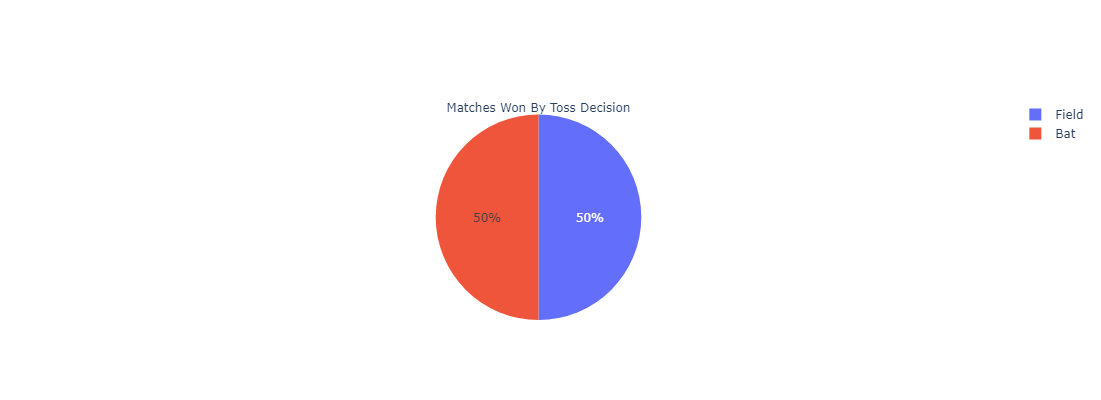

In [21]:
import pandas as pd
import plotly.graph_objects as go

def plot_match_won_by_toss_decision(match_data, season=None , selected_team = None  , venue = None ):
    temp_data = match_data.copy()
    if season is not None:
        temp_data = match_data[match_data['Season'] == season]
    if selected_team is not None : 
        temp_data = temp_data[temp_data['TossWinner'] == selected_team ] 
    if venue is not None : 
        temp_data = temp_data[temp_data['Venue'] == venue ]
    field_wins = temp_data[temp_data['TossDecision'] == 'field']['WinningTeam'].count()
    bat_wins = temp_data[temp_data['TossDecision'] == 'bat']['WinningTeam'].count()
    
    labels = ['Field', 'Bat']
    values = [field_wins, bat_wins]
    
    hover_text = [f'Matches Won when Elected to Field: {field_wins}', f'Matches Won when Elected to Bat: {bat_wins}']
    
    fig = go.Figure(go.Pie(labels=labels, values=values, title='Matches Won By Toss Decision', hovertext=hover_text, hoverinfo='label+text'))
    fig.update_layout(width=400, height=400 )
    
    return fig

# Example usage
fig = plot_match_won_by_toss_decision(match_data , selected_team = "Rajasthan Royals" , season = 2022 , venue = "Narendra Modi Stadium, Ahmedabad" )
fig.show()


In [327]:
pip install mplcursors


     ---------------------------------------- 0.0/88.8 kB ? eta -:--:--
     --------- ------------------------------ 20.5/88.8 kB ? eta -:--:--
     --------- ------------------------------ 20.5/88.8 kB ? eta -:--:--
     ----------------------------------- -- 81.9/88.8 kB 573.4 kB/s eta 0:00:01
     -------------------------------------- 88.8/88.8 kB 456.8 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for mplcursors: filename=mplcursors-0.5.3-py3-none-any.whl size=20744 sha256=67ee9d1441483a34050bcae2414581b7179e857279448df890ee5c6fff5700a3
  Stored in directory: c:\u

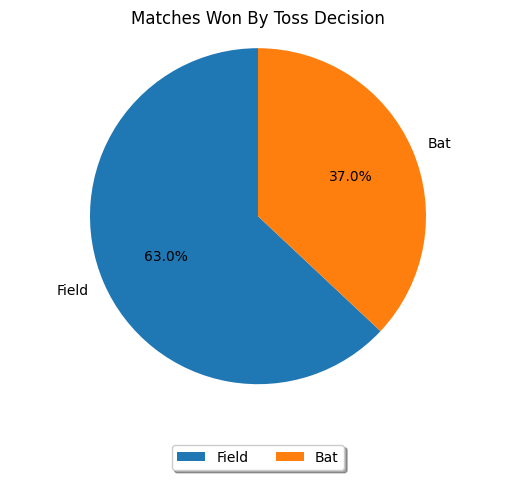

In [328]:
import matplotlib.pyplot as plt
import mplcursors

def plot_match_won_by_toss_decision(match_data, season=None, selected_team=None, venue=None):
    # team_names_dict, reverse_team_mapping = get_mappings()
    temp_data = match_data.copy()
    
    if season is not None:
        temp_data = match_data[match_data['Season'] == season]
    if selected_team is not None:
        temp_data = temp_data[temp_data['TossWinner'] == selected_team]
    if venue is not None:
        temp_data = temp_data[temp_data['Venue'] == venue]
    
    field_wins = temp_data[temp_data['TossDecision'] == 'field']['WinningTeam'].count()
    bat_wins = temp_data[temp_data['TossDecision'] == 'bat']['WinningTeam'].count()

    labels = ['Field', 'Bat']
    values = [field_wins, bat_wins]

    fig, ax = plt.subplots()
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Adding interactivity using mplcursors
    mplcursors.cursor(hover=True)

    ax.set_title('Matches Won By Toss Decision')
    
    # Set legend position to the top
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

    plt.show()

plot_match_won_by_toss_decision(match_data)


### Most Time in Finals 

In [243]:
match_data.columns

Index(['Unnamed: 0', 'ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1',
       'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver',
       'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match',
       'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [244]:
# match_data = pd.read_csv("cleaned_match_data.csv")
match_data[match_data['Season'] == 2019]

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
194,194,1181768,Hyderabad,2019-05-12,2019,Final,Mumbai Indians,Chennai Super Kings,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,...,N,Mumbai Indians,Runs,1.0,NaN,JJ Bumrah,"['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...","['F du Plessis', 'SR Watson', 'SK Raina', 'AT ...",IJ Gould,Nitin Menon
195,195,1181767,Visakhapatnam,2019-05-10,2019,Qualifier,Delhi Capitals,Chennai Super Kings,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Chennai Super Kings,...,N,Chennai Super Kings,Wickets,6.0,NaN,F du Plessis,"['PP Shaw', 'S Dhawan', 'C Munro', 'SS Iyer', ...","['F du Plessis', 'SR Watson', 'SK Raina', 'AT ...",BNJ Oxenford,S Ravi
196,196,1181766,Visakhapatnam,2019-05-08,2019,Eliminator,Sunrisers Hyderabad,Delhi Capitals,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Delhi Capitals,...,N,Delhi Capitals,Wickets,2.0,NaN,RR Pant,"['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",BNJ Oxenford,S Ravi
197,197,1181764,Chennai,2019-05-07,2019,Qualifier,Chennai Super Kings,Mumbai Indians,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,...,N,Mumbai Indians,Wickets,6.0,NaN,SA Yadav,"['F du Plessis', 'SR Watson', 'SK Raina', 'M V...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",NJ Llong,Nitin Menon
198,198,1178430,Chandigarh,2019-05-05,2019,55,Chennai Super Kings,Kings XI Punjab,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,...,N,Kings XI Punjab,Wickets,6.0,NaN,KL Rahul,"['F du Plessis', 'SR Watson', 'SK Raina', 'MS ...","['KL Rahul', 'CH Gayle', 'N Pooran', 'MA Agarw...",C Shamshuddin,KN Ananthapadmanabhan
199,199,1178431,Mumbai,2019-05-05,2019,56,Kolkata Knight Riders,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,...,N,Mumbai Indians,Wickets,9.0,NaN,HH Pandya,"['Shubman Gill', 'CA Lynn', 'RV Uthappa', 'KD ...","['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan ...",A Nand Kishore,CK Nandan
200,200,1178429,Bengaluru,2019-05-04,2019,54,Sunrisers Hyderabad,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,...,N,Royal Challengers Bangalore,Wickets,4.0,NaN,SO Hetmyer,"['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...","['PA Patel', 'V Kohli', 'AB de Villiers', 'SO ...",AK Chaudhary,NJ Llong
201,201,1178428,Delhi,2019-05-04,2019,53,Rajasthan Royals,Delhi Capitals,"Arun Jaitley Stadium, Delhi",Rajasthan Royals,...,N,Delhi Capitals,Wickets,5.0,NaN,A Mishra,"['AM Rahane', 'LS Livingstone', 'SV Samson', '...","['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",AY Dandekar,IJ Gould
202,202,1178427,Chandigarh,2019-05-03,2019,52,Kings XI Punjab,Kolkata Knight Riders,"Punjab Cricket Association IS Bindra Stadium, ...",Kolkata Knight Riders,...,N,Kolkata Knight Riders,Wickets,7.0,NaN,Shubman Gill,"['CH Gayle', 'KL Rahul', 'MA Agarwal', 'N Poor...","['Shubman Gill', 'CA Lynn', 'RV Uthappa', 'AD ...",BNJ Oxenford,C Shamshuddin
203,203,1178426,Mumbai,2019-05-02,2019,51,Mumbai Indians,Sunrisers Hyderabad,"Wankhede Stadium, Mumbai",Mumbai Indians,...,Y,Mumbai Indians,SuperOver,NaN,NaN,JJ Bumrah,"['RG Sharma', 'Q de Kock', 'SA Yadav', 'E Lewi...","['WP Saha', 'MJ Guptill', 'MK Pandey', 'KS Wil...",CK Nandan,S Ravi


In [252]:
match_data[match_data['Team1' ]== 'Rising Pune Supergiant']

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
319,319,1082645,Pune,2017-05-14,2017,55,Rising Pune Supergiant,Kings XI Punjab,"Maharashtra Cricket Association Stadium, Pune",Rising Pune Supergiant,...,N,Rising Pune Supergiant,Wickets,9.0,NaN,JD Unadkat,"['AM Rahane', 'RA Tripathi', 'SPD Smith', 'BA ...","['MJ Guptill', 'WP Saha', 'SE Marsh', 'EJG Mor...",AY Dandekar,A Deshmukh
335,335,1082629,Pune,2017-05-01,2017,39,Rising Pune Supergiant,Gujarat Lions,"Maharashtra Cricket Association Stadium, Pune",Rising Pune Supergiant,...,N,Rising Pune Supergiant,Wickets,5.0,NaN,BA Stokes,"['AM Rahane', 'RA Tripathi', 'SPD Smith', 'MK ...","['Ishan Kishan', 'BB McCullum', 'SK Raina', 'A...",M Erasmus,C Shamshuddin
340,340,1082624,Pune,2017-04-29,2017,34,Rising Pune Supergiant,Royal Challengers Bangalore,"Maharashtra Cricket Association Stadium, Pune",Royal Challengers Bangalore,...,N,Rising Pune Supergiant,Runs,61.0,NaN,LH Ferguson,"['AM Rahane', 'RA Tripathi', 'SPD Smith', 'MK ...","['TM Head', 'V Kohli', 'AB de Villiers', 'KM J...",KN Ananthapadmanabhan,M Erasmus
344,344,1082620,Pune,2017-04-26,2017,30,Rising Pune Supergiant,Kolkata Knight Riders,"Maharashtra Cricket Association Stadium, Pune",Kolkata Knight Riders,...,N,Kolkata Knight Riders,Wickets,7.0,NaN,RV Uthappa,"['AM Rahane', 'RA Tripathi', 'SPD Smith', 'MS ...","['SP Narine', 'G Gambhir', 'RV Uthappa', 'DM B...",AY Dandekar,NJ Llong
348,348,1082615,Pune,2017-04-22,2017,24,Rising Pune Supergiant,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Rising Pune Supergiant,...,N,Rising Pune Supergiant,Wickets,6.0,NaN,MS Dhoni,"['AM Rahane', 'RA Tripathi', 'SPD Smith', 'MS ...","['DA Warner', 'S Dhawan', 'KS Williamson', 'MC...",AY Dandekar,A Deshmukh
364,364,1082599,Pune,2017-04-11,2017,9,Rising Pune Supergiant,Delhi Daredevils,"Maharashtra Cricket Association Stadium, Pune",Rising Pune Supergiant,...,N,Delhi Daredevils,Runs,97.0,NaN,SV Samson,"['AM Rahane', 'MA Agarwal', 'F du Plessis', 'R...","['AP Tare', 'SW Billings', 'SV Samson', 'RR Pa...",AY Dandekar,S Ravi
371,371,1082592,Pune,2017-04-06,2017,2,Rising Pune Supergiant,Mumbai Indians,"Maharashtra Cricket Association Stadium, Pune",Rising Pune Supergiant,...,N,Rising Pune Supergiant,Wickets,7.0,NaN,SPD Smith,"['AM Rahane', 'MA Agarwal', 'SPD Smith', 'BA S...","['PA Patel', 'JC Buttler', 'RG Sharma', 'N Ran...",A Nand Kishore,S Ravi


In [99]:
temp_data = match_data[match_data['MatchNumber'] == 'Final']
final_teams = list(temp_data['Team1']) + list(temp_data['Team2']) 
temp_data2 = match_data.copy()
# temp_data2 = temp_data2[(temp_data2['MatchNumber'] == 'Qualifier 1') | (temp_data2['MatchNumber'] == 'Eliminator')] 
playoff_teams = [] 
final_teams = []
finals_won = list(temp_data2[temp_data2['MatchNumber'] == "Final"]['WinningTeam'])
for i in range(2008 , 2023 ) :
    season_data = temp_data2[(temp_data2['Season'] == i) ]
    season_data = season_data.reset_index(drop = True) 
    curr_season_playoffs = []
    for j in range(len(season_data)): 
        if len(season_data['MatchNumber'][j]) > 2 : 
            curr_season_playoffs.append(season_data['Team1'][j]) 
            curr_season_playoffs.append(season_data['Team2'][j])
        if season_data['MatchNumber'][j] == "Final": 
            final_teams.append(season_data['Team1'][j])
            final_teams.append(season_data['Team2'][j]) 
        
    curr_season_playoffs = list(set(curr_season_playoffs))
    playoff_teams.extend(curr_season_playoffs)
print(playoff_teams)
print(final_teams)
finals_won

['Chennai Super Kings', 'Delhi Daredevils', 'Rajasthan Royals', 'Kings XI Punjab', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Deccan Chargers', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Deccan Chargers', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings', 'Mumbai Indians', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Royal Challengers Bangalore', 'Mumbai Indians', 'Rajasthan Royals', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Gujarat Lions', 'Sunrisers Hyderabad', 'Mumbai Indians', 'Rising Pune Supergiant', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Chennai S

['Gujarat Titans',
 'Chennai Super Kings',
 'Mumbai Indians',
 'Mumbai Indians',
 'Chennai Super Kings',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Chennai Super Kings',
 'Chennai Super Kings',
 'Deccan Chargers',
 'Rajasthan Royals']

{'Kings XI Punjab', 'Mumbai Indians', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Rising Pune Supergiants', 'Gujarat Titans', 'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers'}


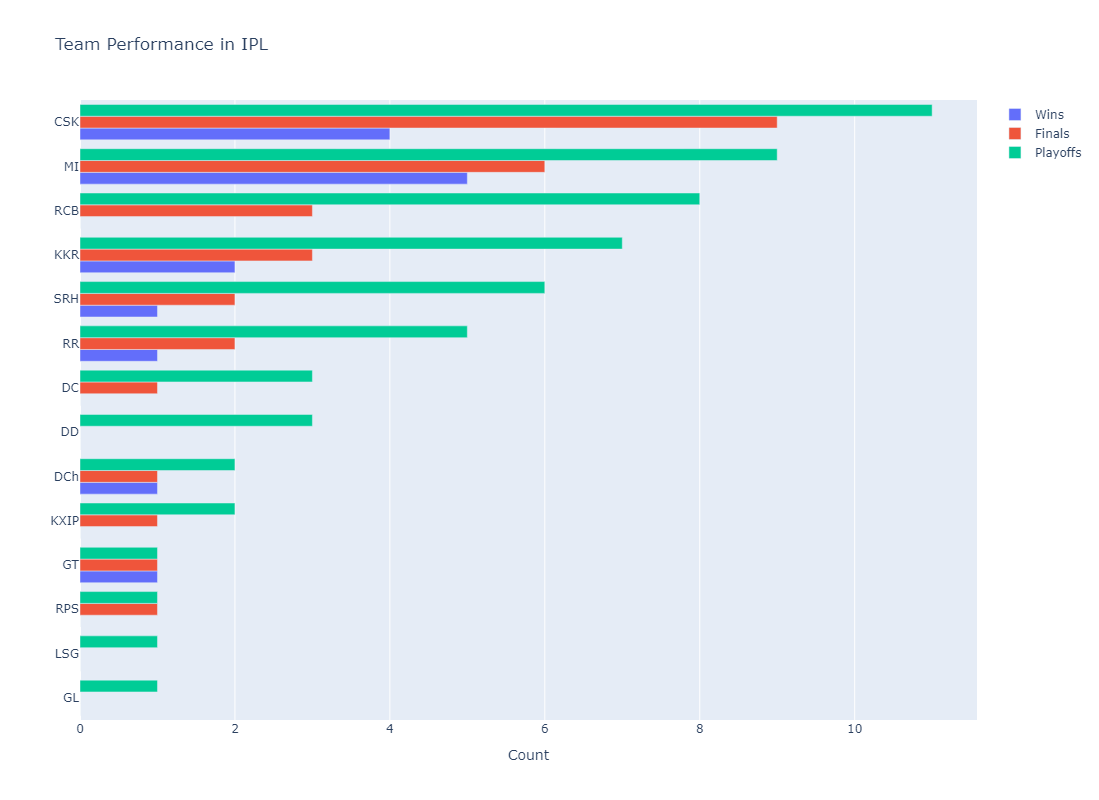

In [274]:
import plotly.graph_objects as go
import plotly.graph_objects as go

team_names_dict = {
    "Chennai Super Kings": "CSK",
    "Mumbai Indians": "MI",
    "Royal Challengers Bangalore": "RCB",
    "Kolkata Knight Riders": "KKR",
    "Sunrisers Hyderabad": "SRH",
    "Rajasthan Royals": "RR",
    "Delhi Capitals": "DC",
    "Delhi Daredevils": "DD",
    "Deccan Chargers": "DCh",
    "Kings XI Punjab": "KXIP",
    "Gujarat Titans": "GT",
    "Rising Pune Supergiants": "RPS",
    "Lucknow Super Giants": "LSG",
    "Gujarat Lions": "GL",
    "Punjab Kings" : "PBKS",
    "Gujarat Titans" : "GT",
    "Pune Warriors" : "PW" , 
    "Kochi Tuskers Kerala" : "KTK"
}

reverse_team_mapping = {}
for i in team_names_dict:
    reverse_team_mapping[team_names_dict[i]] = i 
def plot_team_performance(match_data):
    temp_data = match_data[match_data['MatchNumber'] == 'Final']
    final_teams = list(temp_data['Team1']) + list(temp_data['Team2']) 
    print(set(final_teams))
    temp_data2 = match_data.copy()
    playoff_teams = [] 
    final_teams = []
    finals_won = list(temp_data2[temp_data2['MatchNumber'] == "Final"]['WinningTeam'])
    for i in range(2008, 2023):
        season_data = temp_data2[(temp_data2['Season'] == i)]
        season_data = season_data.reset_index(drop=True) 
        curr_season_playoffs = []
        for j in range(len(season_data)): 
            if len(season_data['MatchNumber'][j]) > 2: 
                curr_season_playoffs.append(season_data['Team1'][j]) 
                curr_season_playoffs.append(season_data['Team2'][j])
            if season_data['MatchNumber'][j] == "Final": 
                final_teams.append(season_data['Team1'][j])
                final_teams.append(season_data['Team2'][j]) 
            
        curr_season_playoffs = list(set(curr_season_playoffs))
        playoff_teams.extend(curr_season_playoffs)
    team_counts = {}
    for team in playoff_teams:
        if team not in team_counts:
            team_counts[team] = {'Playoffs': playoff_teams.count(team), 'Finals': final_teams.count(team), 'Wins': finals_won.count(team)}
    
    # Sort teams based on playoffs, finals, and wins counts
    sorted_teams = sorted(team_counts.items(), key=lambda x: (x[1]['Playoffs'], x[1]['Finals'], x[1]['Wins']),)
    team_names = [team_names_dict[team[0]] for team in sorted_teams]
    playoff_counts = [team[1]['Playoffs'] for team in sorted_teams]
    finals_counts = [team[1]['Finals'] for team in sorted_teams]
    wins_counts = [team[1]['Wins'] for team in sorted_teams]
    
    # Create custom hover text for each bar
    hover_text = [f"{reverse_team_mapping[team]} ({team})<br>Playoffs: {playoff}<br>Finals: {finals}<br>Titles: {wins}" for team, playoff, finals, wins in zip(team_names, playoff_counts, finals_counts, wins_counts)]
    
    # Create traces for each stack
    playoffs_trace = go.Bar(y=team_names, x=playoff_counts, name='Playoffs', orientation='h', hoverinfo='text', hovertext=hover_text)
    finals_trace = go.Bar(y=team_names, x=finals_counts, name='Finals', orientation='h', hoverinfo='text', hovertext=hover_text)
    wins_trace = go.Bar(y=team_names, x=wins_counts, name='Wins', orientation='h', hoverinfo='text', hovertext=hover_text)
    
    # Create layout
    layout = go.Layout(title='Team Performance in IPL', barmode='group', xaxis_title='Count', width=1000, height=800)
    
    # Create figure
    fig = go.Figure(data=[wins_trace, finals_trace, playoffs_trace], layout=layout)
    return fig

fig = plot_team_performance(match_data)
fig.show()

### Match Won by Runs Wickets 

### Most Match Wins by Teams 

In [163]:
Counter(match_data['WinningTeam'])

Counter({'Mumbai Indians': 131,
         'Chennai Super Kings': 121,
         'Kolkata Knight Riders': 114,
         'Royal Challengers Bangalore': 109,
         'Rajasthan Royals': 96,
         'Kings XI Punjab': 88,
         'Sunrisers Hyderabad': 75,
         'Delhi Daredevils': 67,
         'Delhi Capitals': 36,
         'Deccan Chargers': 29,
         'Punjab Kings': 13,
         'Gujarat Lions': 13,
         'Gujarat Titans': 12,
         'Pune Warriors': 12,
         'Rising Pune Supergiant': 10,
         'Lucknow Super Giants': 9,
         'Kochi Tuskers Kerala': 6,
         'Rising Pune Supergiants': 5,
         nan: 4})

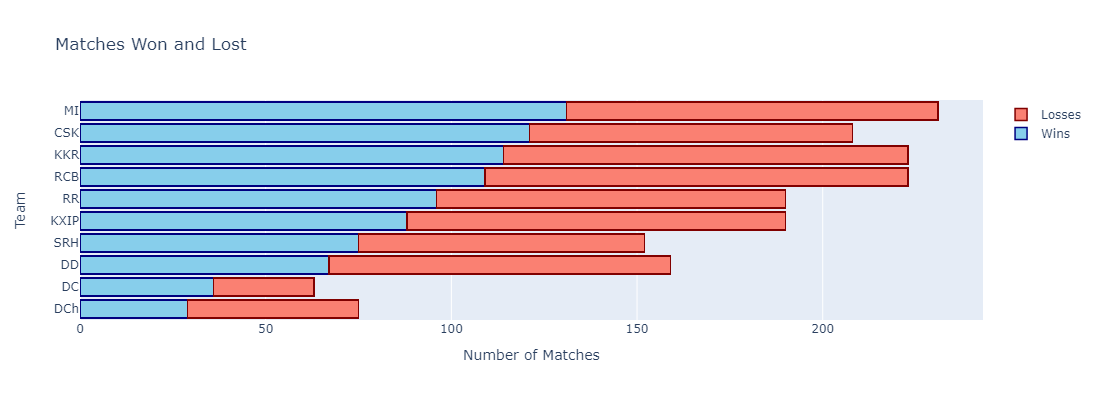

In [318]:
# import pandas as pd
# import plotly.graph_objects as go
# from collections import Counter

# def plot_matches_won_by_teams(match_data, season=None):
#     temp_data = match_data.copy() 
#     if season is not None: 
#         temp_data = temp_data[temp_data['Season'] == season]
#     temp_data = temp_data.dropna(subset=['WinningTeam'])
    
#     winning_teams_count = dict(Counter(temp_data['WinningTeam']))
#     total_team_matches = {} 
#     for i in winning_teams_count:
#         total_team_matches[i] = len( match_data[match_data['Team1'] == i ]) + len( match_data[match_data['Team2'] == i ]) 
#     print(total_team_matches)
#     # Replace original team names with mapped names
#     mapped_teams = [team_names_dict[team] for team in winning_teams_count.keys()]
    
#     sorted_teams = sorted(zip(mapped_teams, winning_teams_count.values()), key=lambda x: x[1])[::-1][:10][::-1]
    
#     teams = [team[0] for team in sorted_teams]
#     wins = [team[1] for team in sorted_teams]
#     hover_text = [f'Team: {reverse_team_mapping[team]}<br>Wins: {win}' for team, win in zip(teams, wins)]

#     # Create horizontal bar chart
#     fig = go.Figure(go.Bar(
#         x=wins,
#         y=teams,
#         orientation='h',
#         hovertext=hover_text,  
#         hoverinfo='text',  # This line adds hover information
#         marker=dict(color='skyblue', line=dict(color='navy', width=1.5))  
#     ))
    
#     fig.update_layout(title='Most Matches Won',
#                       xaxis_title='Number of Wins',
#                       yaxis_title='Team',
#                       yaxis=dict(automargin=True), width=1000, height=400)
#     return fig
# fig = plot_matches_won_by_teams( match_data  )
# fig.show()

import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# Assuming you have the necessary dictionaries defined: team_names_dict and reverse_team_mapping

def plot_matches_won_and_lost_by_teams(match_data, season=None):
    temp_data = match_data.copy() 
    if season is not None: 
        temp_data = temp_data[temp_data['Season'] == season]
    temp_data = temp_data.dropna(subset=['WinningTeam'])
    
    winning_teams_count = dict(Counter(temp_data['WinningTeam']))
    total_team_matches = {} 
    for i in winning_teams_count:
        total_team_matches[i] = len(temp_data[temp_data['Team1'] == i]) + len(temp_data[temp_data['Team2'] == i])
    
    # Calculate losses for each team
    losing_teams_count = {}
    for team, total_matches in total_team_matches.items():
        if team not in winning_teams_count:
            losing_teams_count[team] = total_matches
        else:
            losing_teams_count[team] = total_matches - winning_teams_count[team]
    
    # Replace original team names with mapped names
    mapped_teams = [team_names_dict[team] for team in winning_teams_count.keys()]
    
    sorted_teams = sorted(zip(mapped_teams, winning_teams_count.values(), losing_teams_count.values()), key=lambda x: x[1])[::-1][:10][::-1]
    
    teams = [team[0] for team in sorted_teams]
    wins = [team[1] for team in sorted_teams]
    losses = [team[2] for team in sorted_teams]
    total_matches = [wins[i] + losses[i] for i in range(len(teams))]
    win_percentages = [round((wins[i] / total_matches[i]) * 100, 2) for i in range(len(teams))]
    loss_percentages = [round((losses[i] / total_matches[i]) * 100, 2) for i in range(len(teams))]
    hover_text = [f'Team: {reverse_team_mapping[team]}<br>Wins: {win} ({win_percent}%)<br>Losses: {loss} ({loss_percent}%)' for team, win, loss, win_percent, loss_percent in zip(teams, wins, losses, win_percentages, loss_percentages)]

    # Create stacked bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=wins,
        y=teams,
        orientation='h',
        name='Wins',
        hovertext=hover_text,  
        hoverinfo='text',  
        marker=dict(color='skyblue', line=dict(color='navy', width=1.5))  
    ))
    fig.add_trace(go.Bar(
        x=losses,
        y=teams,
        orientation='h',
        name='Losses',
        hovertext=hover_text,  
        hoverinfo='text',  
        marker=dict(color='salmon', line=dict(color='maroon', width=1.5))  
    ))
    
    fig.update_layout(title='Matches Won and Lost',
                      barmode='stack',
                      xaxis_title='Number of Matches',
                      yaxis_title='Team',
                      yaxis=dict(automargin=True), width=1000, height=400)
    return fig

# Assuming you have the match_data DataFrame and necessary dictionaries defined
fig = plot_matches_won_and_lost_by_teams(match_data)
fig.show()


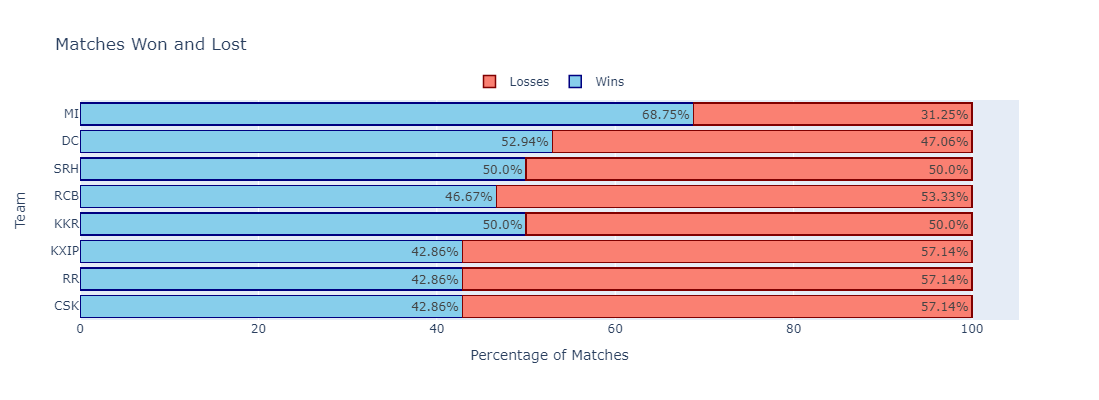

In [321]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter

# Assuming you have the necessary dictionaries defined: team_names_dict and reverse_team_mapping

def plot_percentage_matches_won_and_lost_by_teams(match_data, season=None):
    temp_data = match_data.copy() 
    if season is not None: 
        temp_data = temp_data[temp_data['Season'] == season]
    temp_data = temp_data.dropna(subset=['WinningTeam'])
    
    winning_teams_count = dict(Counter(temp_data['WinningTeam']))
    total_team_matches = {} 
    for i in winning_teams_count:
        total_team_matches[i] = len(temp_data[temp_data['Team1'] == i]) + len(temp_data[temp_data['Team2'] == i])
    
    # Calculate losses for each team
    losing_teams_count = {}
    for team, total_matches in total_team_matches.items():
        if team not in winning_teams_count:
            losing_teams_count[team] = total_matches
        else:
            losing_teams_count[team] = total_matches - winning_teams_count[team]
    
    # Replace original team names with mapped names
    mapped_teams = [team_names_dict[team] for team in winning_teams_count.keys()]
    
    sorted_teams = sorted(zip(mapped_teams, winning_teams_count.values(), losing_teams_count.values()), key=lambda x: x[1])[::-1][:10][::-1]
    
    teams = [team[0] for team in sorted_teams]
    wins = [team[1] for team in sorted_teams]
    losses = [team[2] for team in sorted_teams]
    total_matches = [wins[i] + losses[i] for i in range(len(teams))]
    win_percentages = [round((wins[i] / total_matches[i]) * 100, 2) for i in range(len(teams))]
    loss_percentages = [round((losses[i] / total_matches[i]) * 100, 2) for i in range(len(teams))]
    hover_text = [f'Team: {reverse_team_mapping[team]}<br>Wins: {win} ({win_percent}%)<br>Losses: {loss}({loss_percent}%)' for team, win , win_percent, loss, loss_percent   in zip(teams, wins , win_percentages, losses ,  loss_percentages)]

    # Create stacked bar chart
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=win_percentages,
        y=teams,
        orientation='h',
        name='Wins',
        hovertext=hover_text,  
        text=[f'{wp}%' for wp in win_percentages],  # Text to display within each bar for wins
        textposition='inside',
        hoverinfo='text',  
        marker=dict(color='skyblue', line=dict(color='navy', width=1.5))  
    ))
    fig.add_trace(go.Bar(
        x=loss_percentages,
        y=teams,
        orientation='h',
        name='Losses',
        hovertext=hover_text,  text=[f'{lp}%' for lp in loss_percentages],  # Text to display within each bar for losses
        textposition='inside',
        hoverinfo='text',  
        marker=dict(color='salmon', line=dict(color='maroon', width=1.5))  
    ))
    
    fig.update_layout(title='Matches Won and Lost',
                      barmode='stack',
                      xaxis_title='Percentage of Matches',
                      yaxis_title='Team',
                      yaxis=dict(automargin=True), width=1000, height=400 , 
                    legend=dict(
                            orientation="h",
                            yanchor="top",
                            y=1.15,
                            xanchor="center",
                            x=0.5
                        )
                     )
    return fig

# Assuming you have the match_data DataFrame and necessary dictionaries defined
fig = plot_percentage_matches_won_and_lost_by_teams(match_data , season = 2020 )
fig.show()



In [204]:
for i in range(len(teams)):
    print(teams[i] , wins[i])

Mumbai Indians 131
Chennai Super Kings 121
Kolkata Knight Riders 114
Royal Challengers Bangalore 109
Rajasthan Royals 96
Kings XI Punjab 88
Sunrisers Hyderabad 75
Delhi Daredevils 67
Delhi Capitals 36
Deccan Chargers 29
Punjab Kings 13
Gujarat Lions 13
Gujarat Titans 12
Pune Warriors 12
Rising Pune Supergiant 10
Lucknow Super Giants 9
Kochi Tuskers Kerala 6
Rising Pune Supergiants 5
nan 4


# Teams Tab Plots

In [329]:
match_data.head(2)

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [399]:
match_data.columns

Index(['Unnamed: 0', 'ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1',
       'Team2', 'Venue', 'TossWinner', 'TossDecision', 'SuperOver',
       'WinningTeam', 'WonBy', 'Margin', 'method', 'Player_of_Match',
       'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [398]:
print(match_data)

     Unnamed: 0       ID        City        Date  Season  MatchNumber  \
0             0  1312200   Ahmedabad  2022-05-29    2022        Final   
1             1  1312199   Ahmedabad  2022-05-27    2022  Qualifier 2   
2             2  1312198     Kolkata  2022-05-25    2022   Eliminator   
3             3  1312197     Kolkata  2022-05-24    2022  Qualifier 1   
4             4  1304116      Mumbai  2022-05-22    2022           70   
..          ...      ...         ...         ...     ...          ...   
945         945   335986     Kolkata  2008-04-20    2008            4   
946         946   335985      Mumbai  2008-04-20    2008            5   
947         947   335984       Delhi  2008-04-19    2008            3   
948         948   335983  Chandigarh  2008-04-19    2008            2   
949         949   335982   Bangalore  2008-04-18    2008            1   

                           Team1                        Team2  \
0               Rajasthan Royals               Gujarat Tit

In [331]:
ball_data.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [343]:
batting_team_stats = ball_data.groupby(['BattingTeam' , 'ID']).agg(
    total_runs=('total_run', 'sum'), 
    total_extras=('extras_run', 'sum'),
    total_wickets_lost=('isWicketDelivery', 'sum')
)
batting_team_stats

total_runs  total_extras  total_wickets_lost
BattingTeam         ID                                                   
Chennai Super Kings 335983          240             6                   5
                    335989          208            18                   5
                    335993          152            18                   1
                    335996          178             4                   5
                    336001          169             7                   6
...                                 ...           ...                 ...
Sunrisers Hyderabad 1304096         186            11                   8
                    1304100         125             7                  10
                    1304107         123             3                   8
                    1304111         193             9                   6
                    1304116         157            12                   8

[1898 rows x 3 columns]

In [396]:
def get_scores_data(match_data, ball_data, team, season=None):
    inning1_scores = []
    inning2_scores = []
    inning1_wickets_lost = []
    inning2_wickets_lost = []
    inning1_sixes = []
    inning2_sixes = []
    inning1_fours = []
    inning2_fours = []
    match_ids = list(match_data['ID'])
    for match_id in match_ids:
        temp_data = ball_data[(ball_data['ID'] == match_id) & (ball_data['BattingTeam'] == team)]
        if len(temp_data) == 0:
            continue
        curr_season = match_data[match_data['ID'] == match_id]['Season'].item()
        if curr_season != season and season != None : 
            continue

        runs_scored = temp_data['total_run'].sum()
        wickets_lost = temp_data['isWicketDelivery'].sum()
        fours = len(temp_data[temp_data['batsman_run'] == 4])
        sixes = len(temp_data[temp_data['batsman_run'] == 6])
        if temp_data['innings'].iloc[0] == 1:
            inning1_scores.append(runs_scored)
            inning1_wickets_lost.append(wickets_lost)
            inning1_sixes.append(sixes)
            inning1_fours.append(fours)
        elif temp_data['innings'].iloc[0] == 2:
            inning2_scores.append(runs_scored)
            inning2_wickets_lost.append(wickets_lost)
            inning2_sixes.append(sixes)
            inning2_fours.append(fours)
    avg_inning1_score = 0 
    avg_inning2_score = 0
    max_inning1_score = 0 
    max_inning2_score = 0 
    if len(inning1_scores )> 0 :
        avg_inning1_score = round(sum(inning1_scores) / len(inning1_scores), 0) 
        max_inning1_score = max(inning1_scores)
    if len(inning2_scores )  > 0: 
        avg_inning2_score = round(sum(inning2_scores)/ len(inning1_scores) , 0 ) 
        max_inning2_score = max(inning2_scores)
    avg_score = 0 
    if len(inning1_scores) > 0 or len(inning2_scores) > 0 :  
        avg_score = (sum(inning1_scores) + sum(inning2_scores))/(len(inning1_scores) + len(inning2_scores ))
    total_sixes_inning1 = sum(inning1_sixes)
    total_sixes_inning2 = sum(inning2_sixes)
    total_fours_inning1 = sum(inning1_fours)
    total_fours_inning2 = sum(inning2_fours)
    total_fours = total_fours_inning1 + total_fours_inning2
    total_sixes = total_sixes_inning1 + total_sixes_inning2
    avg_wickets_lost_inning1 = 0 
    avg_wickets_lost_inning2 = 0 
    if len(inning1_wickets_lost) > 0 : 
        avg_wickets_lost_inning1 = sum(inning1_wickets_lost) // len(inning1_wickets_lost) 
    if len(inning2_wickets_lost) > 0 : 
        avg_wickets_lost_inning2 = sum(inning2_wickets_lost) // len(inning2_wickets_lost) 

    best_score = max( max_inning1_score , max_inning2_score )  
    best_score_wicket = 0
    for i in range(len(inning1_scores)):
        if inning1_scores[i] == best_score : 
            best_score_wicket = inning1_wickets_lost[i] 
            break 

    for i in range(len(inning2_scores)):
        if inning2_scores[i] == best_score : 
            best_score_wicket = inning2_wickets_lost[i] 
    matches_played = len(inning1_scores) + len(inning2_scores) 
    
    best = str(best_score) + '/' + str(best_score_wicket)
    return {
        'matches_played' : str(matches_played) , 
        'average_score' : str(int(avg_score)),
        'avg_inning1_score': str(avg_inning1_score),
        'avg_inning2_score': str(avg_inning2_score),
        'total_sixes_inning1': str(total_sixes_inning1),
        'total_sixes_inning2': str(total_sixes_inning2),
        'total_fours_inning1': str(total_fours_inning1),
        'total_fours_inning2': str(total_fours_inning2),
        'total_fours': str(total_fours),
        'total_sixes': str(total_sixes),
        'avg_wickets_lost_inning1': str(avg_wickets_lost_inning1),
        'avg_wickets_lost_inning2': str(avg_wickets_lost_inning2),
        'best' : best
    }

def get_all_teams(match_data):
    return list(match_data['Team1'].unique()) 


def get_all_team_scores_data( match_data , ball_data ) : 
    teams_score_data = {} 
    teams = get_all_teams(match_data) 
    for team in teams:
        team_data = {} 
        team_data["All"] = get_scores_data(match_data , ball_data , team = team ) 
        for season in range(2008 , 2023 ) : 
            team_data[str(season)] = get_scores_data(match_data , ball_data , team = team , season = season ) 
        print(team_data)
        teams_score_data[team] = team_data
    return teams_score_data

teams_score_data = get_all_team_scores_data(match_data , ball_data ) 
print(teams_score_data)


{'All': {'matches_played': '191', 'average_score': '155', 'avg_inning1_score': '162.0', 'avg_inning2_score': '164.0', 'total_sixes_inning1': '492', 'total_sixes_inning2': '521', 'total_fours_inning1': '1322', 'total_fours_inning2': '1318', 'total_fours': '2640', 'total_sixes': '1013', 'avg_wickets_lost_inning1': '6', 'avg_wickets_lost_inning2': '5', 'best': '226/6'}, '2008': {'matches_played': '16', 'average_score': '162', 'avg_inning1_score': '171.0', 'avg_inning2_score': '262.0', 'total_sixes_inning1': '32', 'total_sixes_inning2': '53', 'total_fours_inning1': '105', 'total_fours_inning2': '154', 'total_fours': '259', 'total_sixes': '85', 'avg_wickets_lost_inning1': '6', 'avg_wickets_lost_inning2': '4', 'best': '217/7'}, '2009': {'matches_played': '13', 'average_score': '131', 'avg_inning1_score': '153.0', 'avg_inning2_score': '188.0', 'total_sixes_inning1': '26', 'total_sixes_inning2': '21', 'total_fours_inning1': '71', 'total_fours_inning2': '77', 'total_fours': '148', 'total_sixes'

In [397]:
result

{'Rajasthan Royals': {'All': {'matches_played': '191',
   'average_score': '155',
   'avg_inning1_score': '162.0',
   'avg_inning2_score': '164.0',
   'total_sixes_inning1': '492',
   'total_sixes_inning2': '521',
   'total_fours_inning1': '1322',
   'total_fours_inning2': '1318',
   'total_fours': '2640',
   'total_sixes': '1013',
   'avg_wickets_lost_inning1': '6',
   'avg_wickets_lost_inning2': '5',
   'best': '226/6'},
  '2008': {'matches_played': '16',
   'average_score': '162',
   'avg_inning1_score': '171.0',
   'avg_inning2_score': '262.0',
   'total_sixes_inning1': '32',
   'total_sixes_inning2': '53',
   'total_fours_inning1': '105',
   'total_fours_inning2': '154',
   'total_fours': '259',
   'total_sixes': '85',
   'avg_wickets_lost_inning1': '6',
   'avg_wickets_lost_inning2': '4',
   'best': '217/7'},
  '2009': {'matches_played': '13',
   'average_score': '131',
   'avg_inning1_score': '153.0',
   'avg_inning2_score': '188.0',
   'total_sixes_inning1': '26',
   'total_six

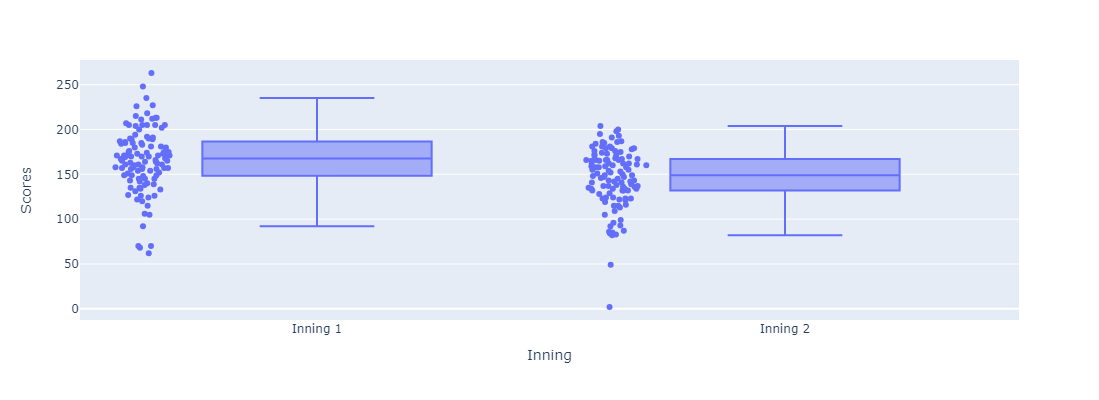

In [377]:
import plotly.express as px
import pandas as pd

def plot_innings_scores_box_plotly(match_data, ball_data, team):
    inning1_scores = []
    inning2_scores = []

    match_ids = list(match_data['ID'])
    for match_id in match_ids:
        temp_data = ball_data[(ball_data['ID'] == match_id) & (ball_data['BattingTeam'] == team)]
        if len(temp_data) == 0:
            continue

        runs_scored = temp_data['total_run'].sum()
        if temp_data['innings'].iloc[0] == 1:
            inning1_scores.append(runs_scored)
        elif temp_data['innings'].iloc[0] == 2:
            inning2_scores.append(runs_scored)

    # Create a DataFrame for Plotly
    data = pd.DataFrame({'Inning': ['Inning 1'] * len(inning1_scores) + ['Inning 2'] * len(inning2_scores),
                         'Scores': inning1_scores + inning2_scores})

    # Create box plot with Plotly
    fig = px.box(data, x='Inning', y='Scores', points="all", hover_data=["Scores"],
                 labels={'Scores': 'Scores'})

    # Calculate and show average and median scores on hover
    fig.update_traces(hovertemplate='Scores: %{y}<br>' +
                                     'Average Score: %{mean}<br>' +
                                     'Median Score: %{median}' ,  )
    fig.update_layout( width = 400 , height = 400)
    # Show the plot
    fig.show( )

# Call the function to plot the box plot
plot_innings_scores_box_plotly(match_data, ball_data, team='Royal Challengers Bangalore')


In [412]:
ball_data.head(1)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [450]:
match_data.head(5)

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,...,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,...,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


### Best BatsMan

In [512]:
import pandas as pd

def get_top_batsman(ball_data, match_data, team_name, season=None):
    team_data = ball_data[ball_data['BattingTeam'] == team_name].reset_index(drop=True)
    
    team_data = team_data.merge(match_data[['ID', 'Season']], on='ID', how='left')
    
    if season is not None:
        team_data = team_data[team_data['Season'] == season]

    player_total_runs = team_data.groupby('batter')['batsman_run'].sum().reset_index()
    player_total_runs.columns = ['Player', 'TotalRuns']

    best_players = player_total_runs[player_total_runs['TotalRuns'] == max(player_total_runs['TotalRuns'])]
    
    return best_players.iloc[0]['Player'] , best_players.iloc[0]['TotalRuns']

# Example usage:
best_players = get_top_batsman(ball_data, match_data, "Royal Challengers Bangalore", season= 2016 )
best_players

('V Kohli', 973)

In [480]:
players_run = x.groupby('batter')['batsman_run'].sum()
print(dict(players_run)[''])

6634


### Best Bowler

In [576]:


def get_top_bowlers(ball_data, match_data, team_name, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season]
    team_data = ball_data[ball_data['BowlingTeam'] == team_name]
    bowler_wickets = team_data.groupby('bowler')['isWicketDelivery'].sum().reset_index()
    best_bowler_data = bowler_wickets[bowler_wickets['isWicketDelivery'] == bowler_wickets['isWicketDelivery'].max()]
    best_bowler = best_bowler_data.iloc[0]['bowler']
    best_wickets = best_bowler_data.iloc[0]['isWicketDelivery']
    return best_bowler, best_wickets

get_top_bowlers(ball_data , match_data , "Chennai Super Kings"  )

('DJ Bravo', 158)

### heatmap of tosswinner vs matchwinner

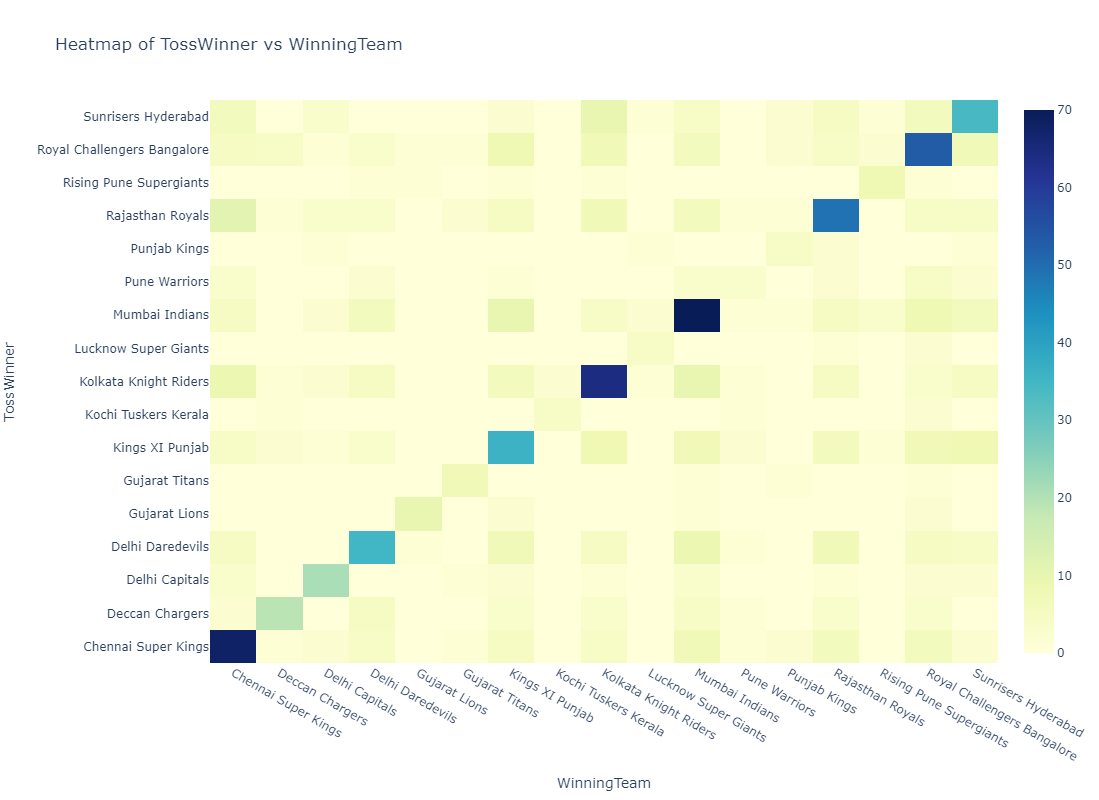

In [580]:
import plotly.graph_objects as go

def plot_heatmap_toss_winner_vs_match_winner(match_data) : 
    cross_tab = pd.crosstab(match_data['TossWinner'], match_data['WinningTeam'])
    
    heatmap = go.Heatmap(
        z=cross_tab.values,
        x=cross_tab.columns,
        y=cross_tab.index,
        colorscale='YlGnBu',
        hoverongaps=False
    )
    
    layout = go.Layout(
        title='Heatmap of TossWinner vs WinningTeam',
        xaxis=dict(title='WinningTeam'),
        yaxis=dict(title='TossWinner'),
        width = 800 , height = 800 
    )
    
    # Create figure
    fig = go.Figure(data=[heatmap], layout=layout)
    return fig 
fig = plot_heatmap_toss_winner_vs_match_winner(match_data)
fig.show()

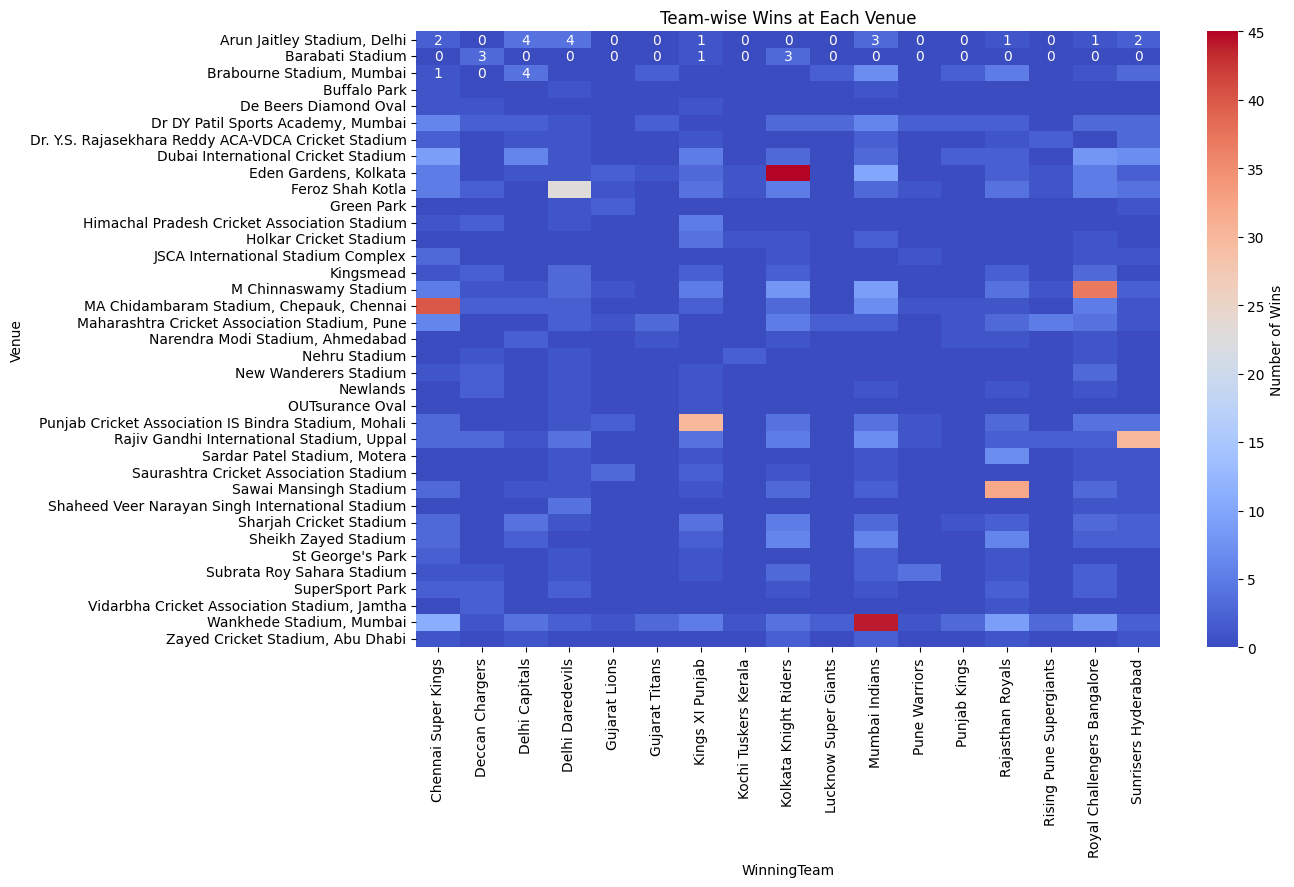

In [409]:
ipl = match_data.copy()
team_venue_wins = ipl.groupby(['Venue', 'WinningTeam']).size().unstack().fillna(0)
team_venue_wins

plt.figure(figsize=(12, 8))
sns.heatmap(team_venue_wins, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Number of Wins'})
plt.title('Team-wise Wins at Each Venue')
plt.show()

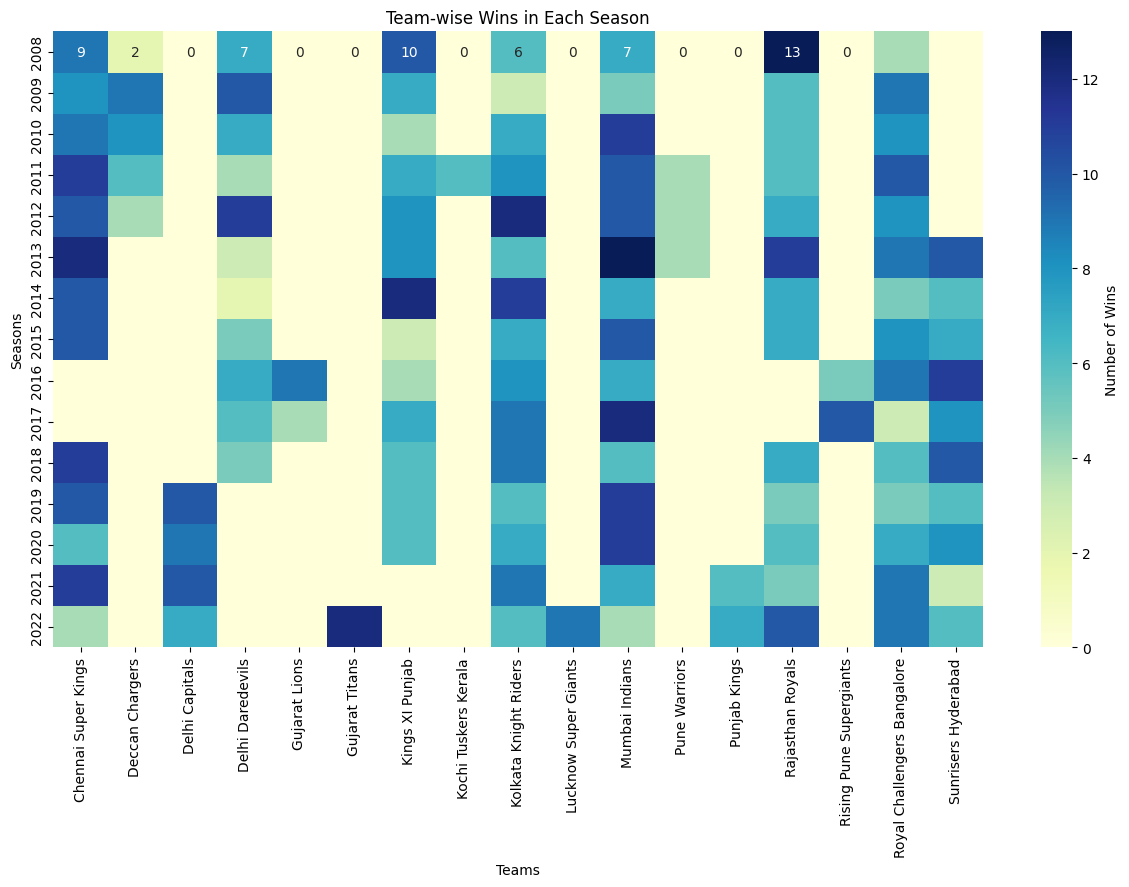

In [410]:
season_team_wins = ipl.groupby(['Season', 'WinningTeam']).size().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(season_team_wins, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Wins'})
plt.title('Team-wise Wins in Each Season')
plt.xlabel('Teams')
plt.ylabel('Seasons')
plt.show()

### Plot Best Batsmen and Best Bowler for team 

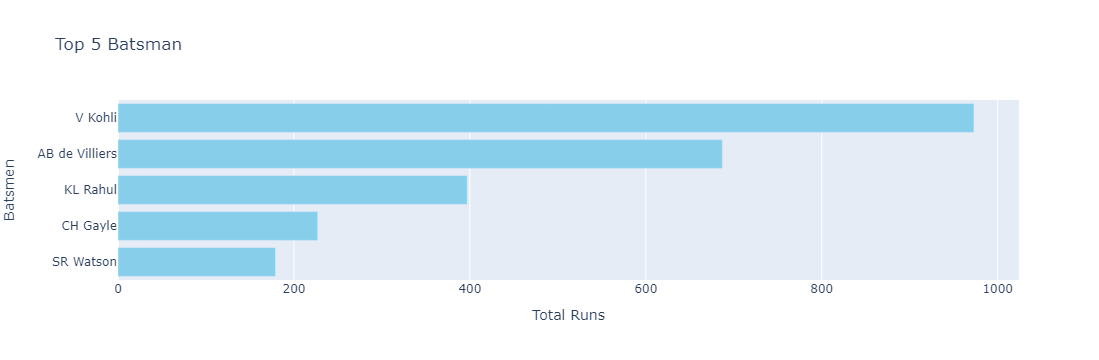

In [657]:
def best_batsmen(ball_data, match_data, team_name, season=None):
    team_data = ball_data[ball_data['BattingTeam'] == team_name].reset_index(drop=True)
    
    team_data = team_data.merge(match_data[['ID', 'Season']], on='ID', how='left')
    
    if season is not None:
        team_data = team_data[team_data['Season'] == season]

    player_total_runs = team_data.groupby('batter')['batsman_run'].sum().reset_index()    
    player_total_runs = player_total_runs.sort_values(by='batsman_run', ascending=False)
    player_total_runs = player_total_runs.reset_index( drop = True ) [0 : 5 ]
    return player_total_runs

def plot_batsmen(batsmen_data):
    fig = go.Figure(go.Bar(
        x=batsmen_data['batsman_run'],
        y=batsmen_data['batter'],
        orientation='h',
        marker_color='skyblue'
    ))
    fig.update_layout(
        title='Top 5 Batsman',
        xaxis_title='Total Runs',
        yaxis_title='Batsmen',
        yaxis_categoryorder='total ascending' 
    )
    return fig 
player_total_runs = best_batsmen(ball_data, match_data, "Royal Challengers Bangalore", season= 2016 )
plot_batsmen( player_total_runs )

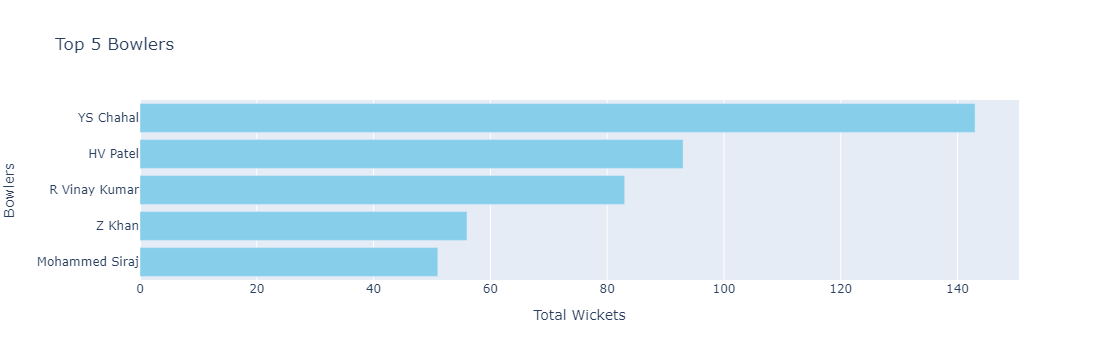

In [664]:

def top_bowlers(ball_data, match_data, team_name, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season]
    team_data = ball_data[ball_data['BowlingTeam'] == team_name]
    bowler_wickets = team_data.groupby('bowler')['isWicketDelivery'].sum().reset_index()
    bowler_wickets = bowler_wickets.sort_values(by='isWicketDelivery', ascending=False)
    top_5_bowlers = bowler_wickets.head(5)
    return top_5_bowlers

def plot_bowlers(bowlers_data):
    fig = go.Figure(go.Bar(
        x=bowlers_data['isWicketDelivery'],
        y=bowlers_data['bowler'],
        orientation='h',
        marker_color='skyblue'
    ))
    fig.update_layout(
        title='Top 5 Bowlers',
        xaxis_title='Total Wickets',
        yaxis_title='Bowlers',
        yaxis_categoryorder='total ascending'
    )
    return fig 

bowlers_data = top_bowlers(ball_data, match_data, "Royal Challengers Bangalore")
fig = plot_bowlers(bowlers_data)
fig.show()

### Matches Won by Stadium 

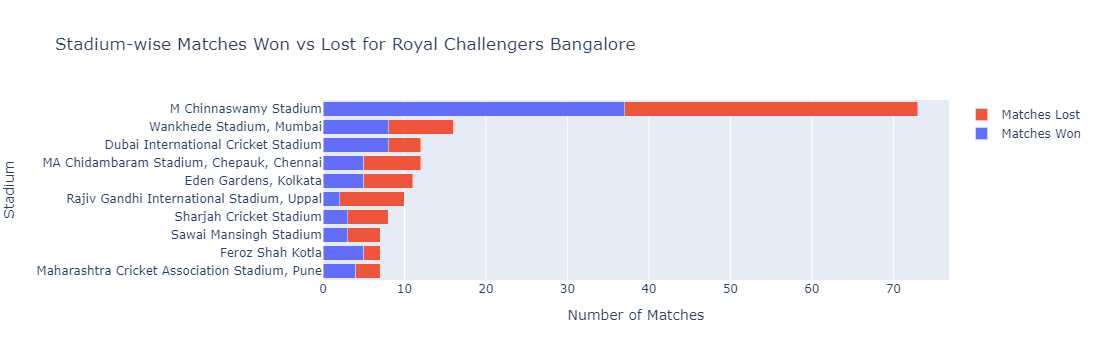

In [665]:
import plotly.graph_objects as go

def filter_data(selected_team):
    filtered_data = match_data[(match_data['Team1'] == selected_team) | (match_data['Team2'] == selected_team)]
    return filtered_data

def plot_stadium_matches_for_team(match_data , selected_team, top_n=10):
    filtered_data = filter_data(selected_team)
    
    # Count matches won and lost by each stadium
    stadium_stats = filtered_data.groupby('Venue')['WinningTeam'].value_counts().unstack(fill_value=0)
    stadium_stats['MatchesLost'] = stadium_stats.sum(axis=1) - stadium_stats.get(selected_team, 0)
    stadium_stats['MatchesWon'] = stadium_stats.get(selected_team, 0)
    
    # Sort stadiums based on total matches played
    stadium_stats['TotalMatches'] = stadium_stats['MatchesWon'] + stadium_stats['MatchesLost']
    stadium_stats = stadium_stats.sort_values(by='TotalMatches', ascending=False).head(top_n)
    stadium_stats = stadium_stats[::-1]
    
    # Plotting using Plotly
    fig = go.Figure(data=[
        go.Bar(name='Matches Won', y=stadium_stats.index, x=stadium_stats['MatchesWon'], orientation='h'),
        go.Bar(name='Matches Lost', y=stadium_stats.index, x=stadium_stats['MatchesLost'], orientation='h')
    ])
    
    fig.update_layout(
        title=f'Stadium-wise Matches Won vs Lost for {selected_team}',
        yaxis=dict(title='Stadium'),
        xaxis=dict(title='Number of Matches'),
        barmode='stack'
    )
    
    # fig.show()
    return fig
    

# Example usage
selected_team = "Royal Challengers Bangalore"
plot_stadium_matches_for_team(selected_team)


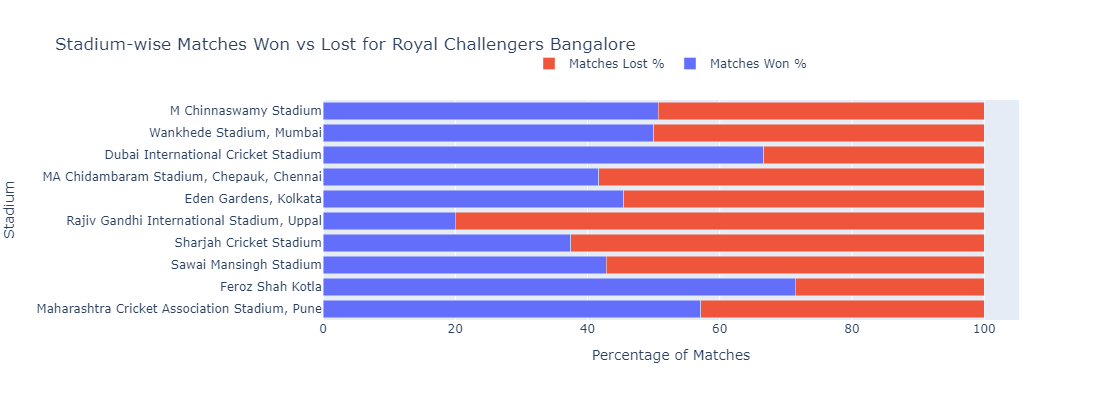

In [660]:
import plotly.graph_objects as go

def filter_data(selected_team , season = None ):
    temp_data = match_data.copy() 
    if season != None : 
        temp_data = temp_data[temp_data['Season'] == season ]
    filtered_data = temp_data[(temp_data['Team1'] == selected_team) | (temp_data['Team2'] == selected_team)]
    return filtered_data

def plot_stadium_matches_for_team(selected_team, top_n=10 , season = None ):
    filtered_data = filter_data(selected_team , season = season)
    
    # Count matches won and lost by each stadium
    stadium_stats = filtered_data.groupby('Venue')['WinningTeam'].value_counts().unstack(fill_value=0)
    stadium_stats['MatchesLost'] = stadium_stats.sum(axis=1) - stadium_stats.get(selected_team, 0)
    stadium_stats['MatchesWon'] = stadium_stats.get(selected_team, 0)
    
    # Calculate percentages
    stadium_stats['MatchesWonPercentage'] = (stadium_stats['MatchesWon'] / (stadium_stats['MatchesWon'] + stadium_stats['MatchesLost'])) * 100
    stadium_stats['MatchesLostPercentage'] = (stadium_stats['MatchesLost'] / (stadium_stats['MatchesWon'] + stadium_stats['MatchesLost'])) * 100
    
    # Sort stadiums based on total matches played
    stadium_stats['TotalMatches'] = stadium_stats['MatchesWon'] + stadium_stats['MatchesLost']
    stadium_stats = stadium_stats.sort_values(by='TotalMatches', ascending=False).head(top_n)
    stadium_stats = stadium_stats[::-1]
    
    # Create custom hover text
    hover_text = [f'Total Matches: {total}<br>Matches Won: {won}<br>Matches Lost: {lost}' 
                  for total, won, lost in zip(stadium_stats['TotalMatches'], 
                                              stadium_stats['MatchesWon'], 
                                              stadium_stats['MatchesLost'])]
    
    # Plotting using Plotly
    fig = go.Figure(data=[
        go.Bar(name='Matches Won %', y=stadium_stats.index, x=stadium_stats['MatchesWonPercentage'], 
               orientation='h', hovertext=hover_text),
        go.Bar(name='Matches Lost %', y=stadium_stats.index, x=stadium_stats['MatchesLostPercentage'], 
               orientation='h', hovertext=hover_text)
    ])
    
    fig.update_layout(
        title=f'Stadium-wise Matches Won vs Lost for {selected_team}',
        yaxis=dict(title='Stadium'),
        xaxis=dict(title='Percentage of Matches'),
        barmode='stack',
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.1,
            xanchor="center",
            x=0.5
        ),
        width = 800 , height = 400 
    )
    
    return fig
    

selected_team = "Royal Challengers Bangalore"
plot_stadium_matches_for_team(selected_team)


### Toss won/match won 

In [610]:
def get_mappings():
    team_names_dict = {
        "Chennai Super Kings": "CSK",
        "Mumbai Indians": "MI",
        "Royal Challengers Bangalore": "RCB",
        "Kolkata Knight Riders": "KKR",
        "Sunrisers Hyderabad": "SRH",
        "Rajasthan Royals": "RR",
        "Delhi Capitals": "DC",
        "Delhi Daredevils": "DD",
        "Deccan Chargers": "DCh",
        "Kings XI Punjab": "KXIP",
        "Gujarat Titans": "GT",
        "Rising Pune Supergiants": "RPS",
        "Lucknow Super Giants": "LSG",
        "Gujarat Lions": "GL",
        "Punjab Kings" : "PBKS",
        "Gujarat Titans" : "GT",
        "Pune Warriors" : "PW" , 
        "Kochi Tuskers Kerala" : "KTK"
    }

    reverse_team_mapping = {}
    for i in team_names_dict:
        reverse_team_mapping[team_names_dict[i]] = i 
    return team_names_dict , reverse_team_mapping

In [623]:
def plot_match_won_by_toss_decision(match_data, season=None, selected_team=None, venue=None):
    team_names_dict, reverse_team_mapping = get_mappings()
    temp_data = match_data.copy()
    
    if season is not None:
        temp_data = match_data[match_data['Season'] == season]
    if selected_team is not None:
        temp_data = temp_data[temp_data['TossWinner'] == selected_team]
    if venue is not None:
        temp_data = temp_data[temp_data['Venue'] == venue]
    
    field_wins = temp_data[temp_data['TossDecision'] == 'field']['WinningTeam'].count()
    bat_wins = temp_data[temp_data['TossDecision'] == 'bat']['WinningTeam'].count()

    labels = ['Field', 'Bat']
    values = [field_wins, bat_wins]

    hover_text = [f'Matches Won when Elected to Field: {field_wins}', f'Matches Won when Elected to Bat: {bat_wins}']

    colors = ['lightseagreen', 'blue'] 

    fig = go.Figure(go.Pie(labels=labels, values=values, title='', hovertext=hover_text, hoverinfo='label+text',
                           marker=dict(colors=colors)))
    fig.update_layout(width=320, height=350, legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.2,
        xanchor="center",
        x=0.5
    ))
    return fig
fig = plot_match_won_by_toss_decision(match_data ,  selected_team = "Rajasthan Royals" )

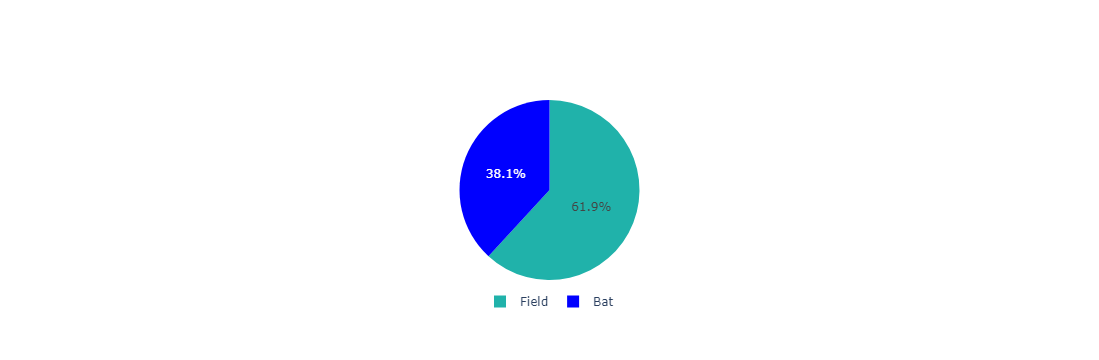

In [624]:
fig.show()

### Opponent Matches 


In [666]:
match_data.head()

,Unnamed: 0,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,...,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,...,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,...,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,...,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,...,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


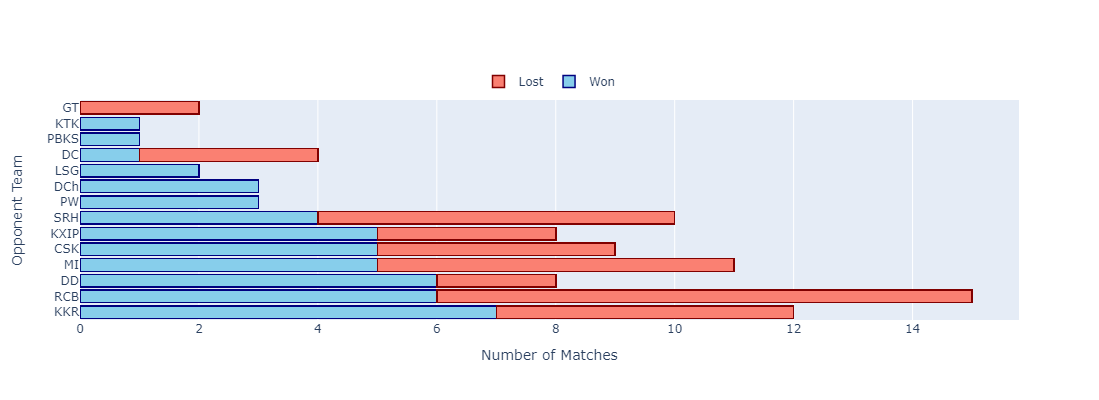

In [699]:

def get_mappings():
    team_names_dict = {
        "Chennai Super Kings": "CSK",
        "Mumbai Indians": "MI",
        "Royal Challengers Bangalore": "RCB",
        "Kolkata Knight Riders": "KKR",
        "Sunrisers Hyderabad": "SRH",
        "Rajasthan Royals": "RR",
        "Delhi Capitals": "DC",
        "Delhi Daredevils": "DD",
        "Deccan Chargers": "DCh",
        "Kings XI Punjab": "KXIP",
        "Gujarat Titans": "GT",
        "Rising Pune Supergiants": "RPS",
        "Lucknow Super Giants": "LSG",
        "Gujarat Lions": "GL",
        "Punjab Kings" : "PBKS",
        "Gujarat Titans" : "GT",
        "Pune Warriors" : "PW" , 
        "Kochi Tuskers Kerala" : "KTK"
    }

    reverse_team_mapping = {}
    for i in team_names_dict:
        reverse_team_mapping[team_names_dict[i]] = i 
    return team_names_dict , reverse_team_mapping


def plot_matches_by_team( df , team_name):
    team_names_dict , reverse_team_mapping = get_mappings()
    team_matches = df[(df['Team1'] == team_name) | (df['Team2'] == team_name)]
    
    team_opponent_matches = team_matches[team_matches['Team2'] != team_name]
    # Count matches won and lost by the specified team against each opponent
    win_counts = team_opponent_matches[team_opponent_matches['WinningTeam'] == team_name]['Team2'].value_counts()
    loss_counts = team_opponent_matches[team_opponent_matches['WinningTeam'] != team_name]['Team2'].value_counts()

    # Create a Plotly stacked bar chart
    fig = go.Figure()

    # Add wins
    fig.add_trace(go.Bar(
       y=[team_names_dict[team] for team in win_counts.index],
        x=win_counts.values,
        name='Won',
        orientation='h',
        marker=dict(color='skyblue', line=dict(color='navy', width=1.5))  ,
        hovertext=[f"{team_name} won {value} matches against {opponent}" for opponent, value in win_counts.items()]
    ))

    # Add losses
    fig.add_trace(go.Bar(
        y=[team_names_dict[team] for team in loss_counts.index],
        x=loss_counts.values,
        name='Lost',
        orientation='h',
        marker=dict(color='salmon', line=dict(color='maroon', width=1.5))  ,
        hovertext=[f"{team_name} lost {value} matches against {opponent}" for opponent, value in loss_counts.items()]
    ))

    fig.update_layout(
        title="",
        xaxis_title='Number of Matches',
        yaxis_title='Opponent Team',
        barmode='stack' , width = 500 , height = 400  , 
        legend=dict(
                orientation="h",
                yanchor="top",
                y=1.15,
                xanchor="center",
                x=0.5
            )
    )
    return fig 
# Example usage
plot_matches_by_team( match_data , 'Rajasthan Royals')

### Batter' Analysis

In [899]:
def get_batter_runs( match_data , ball_data , batter , season = None ) : 
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    if season != None :
        ball_data = ball_data[ball_data['Season'] == season ] 
    ball_data = ball_data[ball_data['batter'] == batter ].reset_index(drop = True )
    total_runs = 0 
    fours = 0 
    sixes = 0 
    dot_balls = 0 
    dismissals = 0 
    matches = len(ball_data['ID'].unique())
    balls = 0 
    run_123 = 0 
    for i in range(len(ball_data)): 
        total_runs += ball_data['batsman_run'][i] 
        fours += ball_data['batsman_run'][i] == 4 
        sixes += ball_data['batsman_run'][i] == 6
        dismissals += ball_data['player_out'][i] == batter 
        balls += 1 
        dot_balls += ball_data['batsman_run'][i] == 0 
        if ball_data['batsman_run'][i] > 0 and ball_data['batsman_run'][i] < 4 : 
            run_123 += 1
    strike_rate = round ((total_runs * 100 )/balls , 2 )
    average = 'inf'
    if dismissals != 0 : 
        average = total_runs/dismissals
    
    fifties = 0 
    hundreds = 0 
    
    match_runs = {} 
    match_ids = list(ball_data['ID'].unique()) 
    for match_id in match_ids : 
        match_runs[match_id] = sum(ball_data[ball_data['ID'] == match_id]['batsman_run']) 
        if match_runs[match_id] >= 100 : 
            hundreds += 1 
        elif match_runs[match_id] >= 50 : 
            fifties += 1 
    data = {
        'total_runs' : total_runs , 
        'fours' : fours , 
        'sixes' : sixes , 
        'strike_rate' : strike_rate , 
        'dismissals' : dismissals , 
        'balls' : balls , 
        'matches' : matches , 
        'hundreds' : hundreds , 
        'fifties' : fifties ,
        'average' : average , 
        'dot_balls' : dot_balls,
        'run123' : run_123
    }
    return data
    
get_batter_runs(match_data , ball_data , "V Kohli" , season = 2022 )

{'total_runs': 341,
 'fours': 32,
 'sixes': 8,
 'strike_rate': 111.44,
 'dismissals': 14,
 'balls': 306,
 'matches': 16,
 'hundreds': 0,
 'fifties': 2,
 'average': 24.357142857142858,
 'dot_balls': 127,
 'run123': 139}

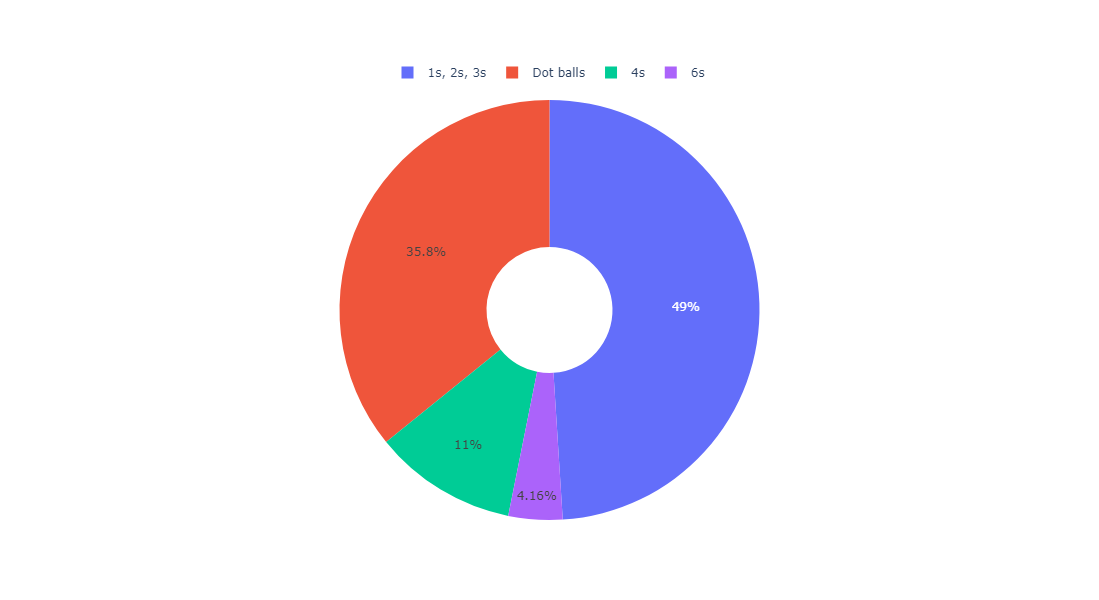

In [908]:

def plot_runs_distribution( match_data , ball_data , batter , season = None ):
    batter_data = get_batter_runs( match_data , ball_data , batter , season = None )
    # Data for pie chart
    labels = ['4s', '6s', '1s, 2s, 3s', 'Dot balls']
    sizes = [batter_data['fours'], batter_data['sixes'], batter_data['run123'], batter_data['dot_balls']]

    # Create pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=sizes, hole=.3)])

    # Update layout
    fig.update_layout(
        title='',
        width=800,
        height=600,
        legend=dict(orientation="h", y=1.1 , x = 0.5 ,
        xanchor="center", )
    )
    return fig

# Example usage:
plot_runs_distribution( match_data , ball_data , "V Kohli" , season = None )

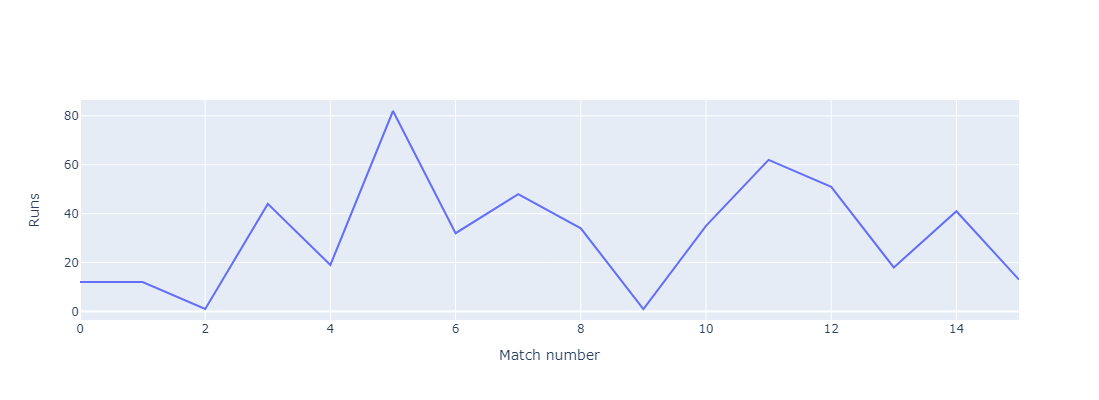

In [839]:
def plot_season_wise_runs( match_data , ball_data , batter , season = None ) : 
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    ball_data = ball_data[ball_data['batter'] == batter ].reset_index(drop = True ) 
    if season == None : 
        
        seasons = [i for i in range(2008 , 2023 ) ] 
        season_wise_runs = {} 
    
        for season in seasons : 
            season_wise_runs[season] = sum(ball_data[ball_data['Season'] ==  season ]['batsman_run']) 
    
        years = list(season_wise_runs.keys())
        runs = list(season_wise_runs.values())
        
        fig = go.Figure(data=go.Scatter(x=years, y=runs, mode='lines'))
        
        fig.update_layout(title='', xaxis_title='Year', yaxis_title='Runs' , width = 500 , height = 400 )
        return fig 
    else:
        ball_data = ball_data[ball_data['Season'] == season ]
        matches = ball_data['ID'].unique() 
        matches_runs = {}
        for match in matches : 
            matches_runs[match] = sum(ball_data[ball_data['ID'] == match]['batsman_run'] ) 
        runs = list(matches_runs.values()) 

        fig = go.Figure(data=go.Scatter(x=[i for i in range(len(runs))], y=runs, mode='lines'))
        fig.update_layout(title='',
                          xaxis_title='Match number',
                          yaxis_title='Runs',
                          width=500, height=400)
        return fig

        
plot_season_wise_runs ( match_data , ball_data , "V Kohli" , season = 2015 )

In [825]:

def plot_batter_dismissals(match_data, ball_data, batter, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season] 
    ball_data = ball_data[ball_data['batter'] == batter].reset_index(drop=True)
    bowler_dismissal = {}
    for i in range(len(ball_data)):
        if ball_data['player_out'][i] == batter:
            bowler = ball_data['bowler'][i]
            if bowler in bowler_dismissal:
                bowler_dismissal[bowler] += 1
            else:
                bowler_dismissal[bowler] = 1 
    sorted_bowlers = dict(sorted(bowler_dismissal.items(), key=lambda item: item[1], reverse=True))
    
    # Get top 10 bowlers
    top_10_bowlers = dict(list(sorted_bowlers.items())[:10][::-1])
    
    # Extracting bowler names and dismissals
    bowler_names = list(top_10_bowlers.keys())
    dismissals = list(top_10_bowlers.values())
    
    # Plotting using Plotly
    fig = go.Figure(data=[go.Bar(x=dismissals, y=bowler_names, orientation='h',
                                 marker=dict(color='skyblue', line=dict(color='navy', width=1.5)))])
    fig.update_layout(title='',
                      xaxis_title='Number of Dismissals',
                      yaxis_title='Bowler' , width = 600 , height = 400 )
    return fig

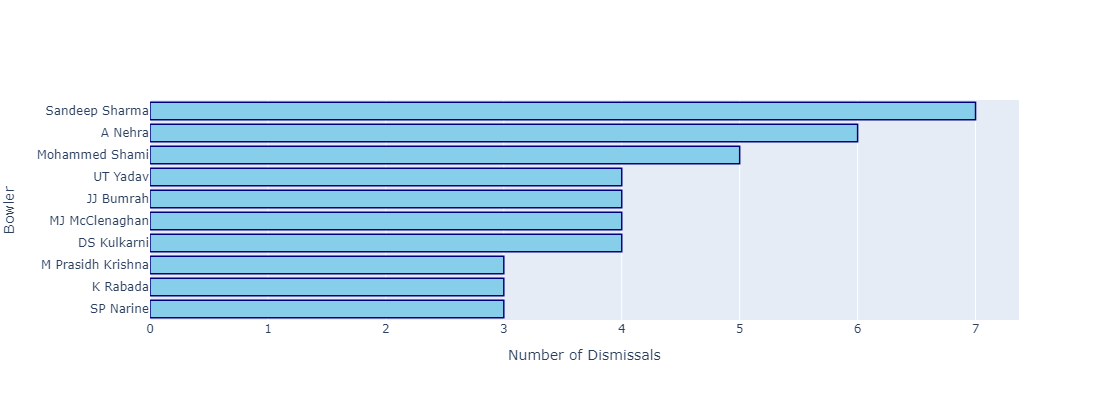

In [826]:
plot_batter_dismissals(match_data , ball_data , 'V Kohli'  )

In [827]:

def stadium_wise_runs(match_data, ball_data, batter, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2', 'Venue']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season] 
    
    ball_data = ball_data[ball_data['batter'] == batter].reset_index(drop=True)
    
    total_batsman_run = ball_data.groupby('Venue')['batsman_run'].sum().reset_index()
    
    total_batsman_run = total_batsman_run.sort_values(by='batsman_run', ascending=False).head(5)[::-1]  
    
    fig = go.Figure(go.Bar(
        x=total_batsman_run['batsman_run'],
        y=total_batsman_run['Venue'],
        orientation='h',
        marker=dict(color='skyblue', line=dict(color='navy', width=1))
    ))
    
    fig.update_layout(
        title='',
        xaxis_title='Total Runs',
        yaxis_title='Venue',
        width=700,
        height=400
    )
    
    return fig

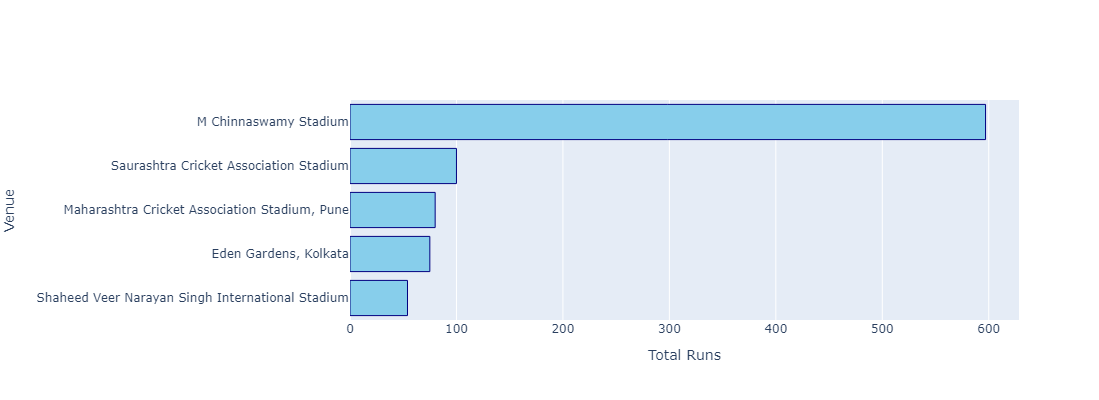

In [828]:
stadium_wise_runs(match_data , ball_data , batter , season = 2016 )

In [791]:
len(match_data['Venue'].unique())

37

In [831]:
def plot_runs_scored_against_bowlers(match_data, ball_data, batter, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season] 
    ball_data = ball_data[ball_data['batter'] == batter].reset_index(drop=True)
    
    bowler_runs = {}
    for i in range(len(ball_data)):
        bowler = ball_data['bowler'][i]
        runs = ball_data['batsman_run'][i]
        if bowler in bowler_runs:
            bowler_runs[bowler] += runs
        else:
            bowler_runs[bowler] = runs
    
    # Get top 10 bowlers
    top_10_bowlers = dict(sorted(bowler_runs.items(), key=lambda item: item[1], reverse=True)[:10][::-1])
    
    # Extracting bowler names and runs scored
    bowler_names = list(top_10_bowlers.keys())
    runs_scored = list(top_10_bowlers.values())
    
    # Plotting using Plotly
    fig = go.Figure(data=[go.Bar(x=runs_scored, y=bowler_names, orientation='h',
                                 marker=dict(color='skyblue', line=dict(color='navy', width=1.5)))])
    fig.update_layout(title='',
                      xaxis_title='Runs Scored',
                      yaxis_title='Bowler', 
                      width=600, height=400)
    return fig

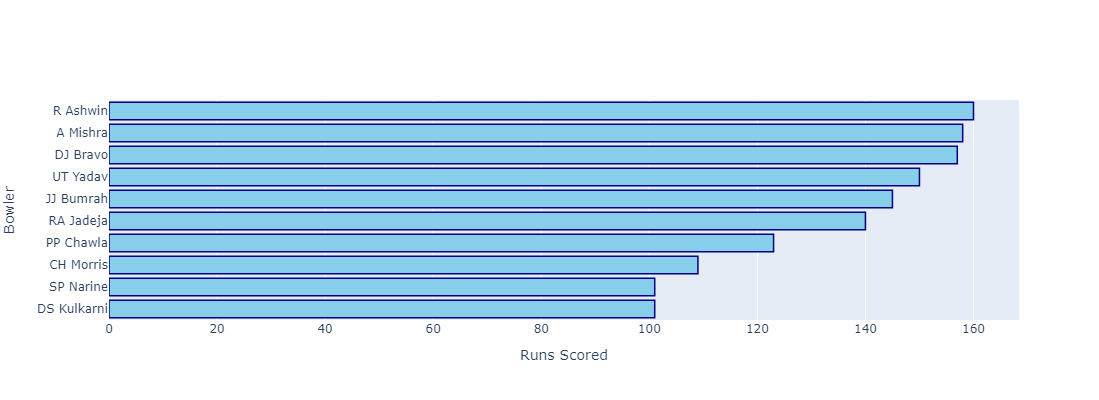

In [832]:
plot_runs_scored_against_bowlers(match_data, ball_data, batter, season=None)

In [891]:
def plot_season_wise_violin_plot(match_data, ball_data, batter, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    ball_data = ball_data[ball_data['batter'] == batter].reset_index(drop=True)
    
    if season is None:
        seasons = [i for i in range(2008, 2023)]
        season_wise_runs = {}

        for season in seasons:
            season_wise_runs[season] = []
            matches = ball_data[(ball_data['Season'] == season)]['ID'].unique()
            for match in matches:
                runs = sum(ball_data[(ball_data['Season'] == season) & (ball_data['ID'] == match)]['batsman_run'])
                season_wise_runs[season].append(runs)

        years = list(season_wise_runs.keys())
        values = list(season_wise_runs.values())

        traces = []

        for i, year in enumerate(years):
            trace = go.Violin(y=values[i], name=str(year), box_visible=False, meanline_visible=True, line_color='salmon', showlegend=False)
            traces.append(trace)

        layout = go.Layout(title="", yaxis=dict(title="Values"), width=600, height=400)
        fig = go.Figure(data=traces, layout=layout)
        return fig
    else:
        ball_data = ball_data[ball_data['Season'] == season]
        matches = ball_data['ID'].unique()
        matches_runs = {}
        for match in matches:
            matches_runs[match] = sum(ball_data[ball_data['ID'] == match]['batsman_run'])
        runs = list(matches_runs.values())

        fig = go.Figure(data=go.Violin(y=runs, box_visible=False, meanline_visible=True, line_color='salmon'))
        fig.update_layout(title='', yaxis_title='Runs', width=500, height=400)
        return fig

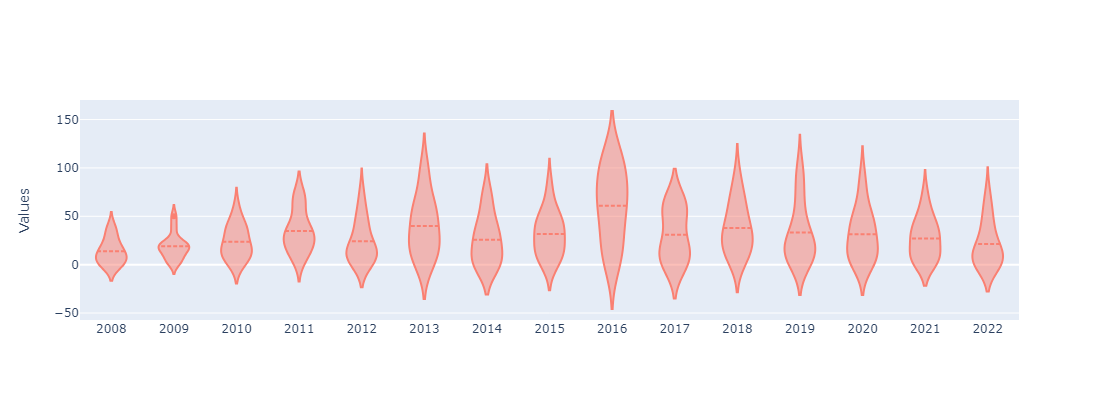

In [894]:
plot_season_wise_violin_plot( match_data , ball_data , "V Kohli"  )

### Bowler 

In [914]:
def get_bowler_wickets(match_data, ball_data, bowler, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season] 
    
    ball_data = ball_data[ball_data['bowler'] == bowler].reset_index(drop=True)
    
    total_wickets = ball_data['player_out'].notnull().sum()
    total_runs_given = ball_data['total_run'].sum()
    total_balls_bowled = len(ball_data)
    economy_rate = (total_runs_given / total_balls_bowled) * 6
    if total_wickets != 0:
        average = total_runs_given / total_wickets
    else:
        average = None
    
    data = {
        'total_wickets': total_wickets,
        'total_runs_given': total_runs_given,
        'total_balls_bowled': total_balls_bowled,
        'economy_rate': economy_rate,
        'average': average
    }
    return data
get_bowler_wickets(match_data , ball_data , bowler = "Mohammed Shami" , season = 2022 )

{'total_wickets': 21,
 'total_runs_given': 491,
 'total_balls_bowled': 378,
 'economy_rate': 7.793650793650793,
 'average': 23.38095238095238}

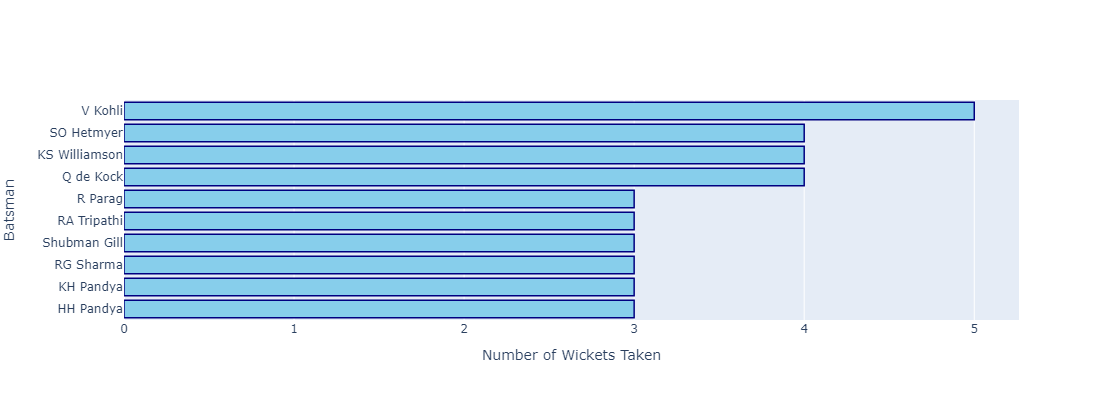

In [920]:
def plot_bowler_wickets(match_data, ball_data, bowler, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    
    if season is not None:
        ball_data = ball_data[ball_data['Season'] == season] 
    
    ball_data = ball_data[ball_data['bowler'] == bowler].reset_index(drop=True)
    
    bowler_wickets = {}
    for i in range(len(ball_data)):
        player_out = ball_data['player_out'][i]
        if pd.notnull(player_out):
            if player_out in bowler_wickets:
                bowler_wickets[player_out] += 1
            else:
                bowler_wickets[player_out] = 1
    
    # Sort the bowlers by the number of wickets taken
    sorted_bowler_wickets = dict(sorted(bowler_wickets.items(), key=lambda item: item[1], reverse=True))
    
    # Extracting batsmen names and wickets taken
    batsmen_names = list(sorted_bowler_wickets.keys())[0:10][::-1]
    wickets_taken = list(sorted_bowler_wickets.values())[0:10][::-1]
    
    # Plotting using Plotly
    fig = go.Figure(data=[go.Bar(x=wickets_taken, y=batsmen_names, orientation='h',
                                 marker=dict(color='skyblue', line=dict(color='navy', width=1.5)))])
    fig.update_layout(title='',
                      xaxis_title='Number of Wickets Taken',
                      yaxis_title='Batsman',
                      width=600, height=400)
    return fig

plot_bowler_wickets(match_data , ball_data , bowler = "Mohammed Shami" , )

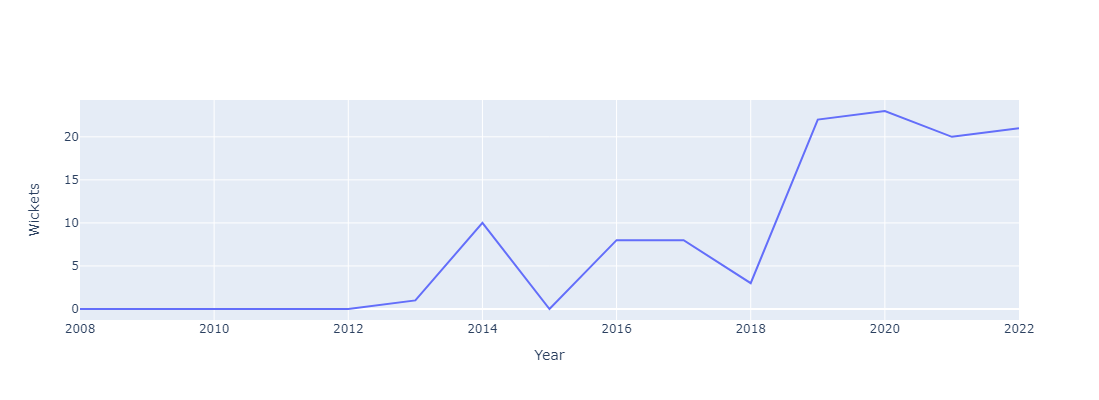

In [921]:
def plot_season_wise_wickets(match_data, ball_data, bowler, season=None):
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    
    if season is None:
        seasons = range(2008, 2023)
        season_wise_wickets = {}

        for season in seasons:
            ball_data_season = ball_data[ball_data['Season'] == season]
            bowler_data_season = ball_data_season[ball_data_season['bowler'] == bowler].reset_index(drop=True)
            season_wise_wickets[season] = bowler_data_season['player_out'].notnull().sum()

        years = list(season_wise_wickets.keys())
        wickets = list(season_wise_wickets.values())

        fig = go.Figure(data=go.Scatter(x=years, y=wickets, mode='lines'))
        fig.update_layout(title='', xaxis_title='Year', yaxis_title='Wickets', width=600, height=400)
        return fig
    else:
        ball_data_season = ball_data[ball_data['Season'] == season]
        bowler_data_season = ball_data_season[ball_data_season['bowler'] == bowler].reset_index(drop=True)
        matches = bowler_data_season['ID'].unique()
        matches_wickets = {}
        for match in matches:
            matches_wickets[match] = bowler_data_season[bowler_data_season['ID'] == match]['player_out'].notnull().sum()
        wickets = list(matches_wickets.values())

        fig = go.Figure(data=go.Scatter(x=[i for i in range(len(wickets))], y=wickets, mode='lines'))
        fig.update_layout(title='', xaxis_title='Match number', yaxis_title='Wickets', width=500, height=400)
        return fig
plot_season_wise_wickets(match_data , ball_data , "Mohammed Shami")

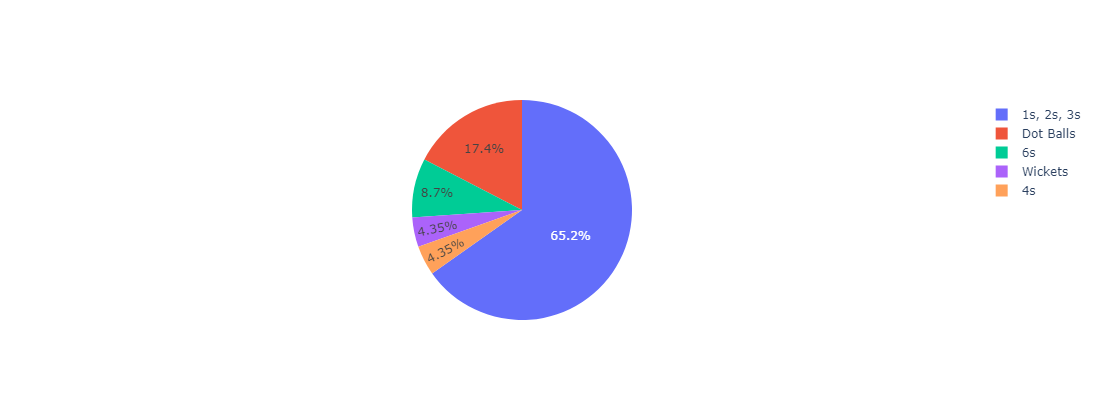

In [934]:
def plot_wickets_dot_4s_6s(ball_data, bowler , season = None ):
    # Filter ball data for the specific bowler
    ball_data = ball_data.merge(match_data[['ID', 'Season', 'Team1', 'Team2']], on='ID', how='left')
    ball_data['BowlingTeam'] = np.where(ball_data['BattingTeam'] != ball_data['Team1'], ball_data['Team1'], ball_data['Team2'])
    ball_data = ball_data[ball_data['batter'] == batter].reset_index(drop=True)
    if season != None :
        ball_data = ball_data[ball_data['Season'] == season ]
    bowler_data = ball_data[ball_data['bowler'] == bowler]
    
    # Count wickets, dot balls, 4s, and 6s
    wickets = bowler_data['player_out'].count()
    dot_balls = bowler_data[bowler_data['batsman_run'] == 0]['batsman_run'].count()
    fours = bowler_data[bowler_data['batsman_run'] == 4]['batsman_run'].count()
    sixes = bowler_data[bowler_data['batsman_run'] == 6]['batsman_run'].count()
    one_two_three = bowler_data[(bowler_data['batsman_run'] > 0) & (bowler_data['batsman_run'] < 4)]['batsman_run'].count()
    
    # Create labels and values for the pie chart
    labels = ['Wickets', 'Dot Balls', '4s', '6s', '1s, 2s, 3s']
    values = [wickets, dot_balls, fours, sixes, one_two_three]
    
    # Create the pie chart
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title='' , width = 600 , height = 400 )
    
    return fig

# Example usage:
plot_wickets_dot_4s_6s(ball_data, 'Rashid Khan' , 2022 )